In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:/606/RoadMaintenance/Datasets/FinalDataSet/Updated_FinalFilteredCombined.csv')

In [3]:
df.isna().sum()

AADT_VN              0
BEGIN_POIN           0
COUNTY_COD           0
END_POINT            0
F_SYSTEM_V           0
IRI_VN               1
IS_IMPROVED          0
ROUTE_ID             0
ROUTE_NUMB         504
SPEED_LIMI         504
THROUGH_LA           0
TRUCK_VN          6328
URBAN_CODE           0
Unnamed: 0           0
YEAR_RECOR           0
curval               0
geometry_paths       0
tmiles               0
tons                 0
value                0
dtype: int64

In [4]:
df.dtypes

AADT_VN           float64
BEGIN_POIN        float64
COUNTY_COD        float64
END_POINT         float64
F_SYSTEM_V        float64
IRI_VN            float64
IS_IMPROVED       float64
ROUTE_ID           object
ROUTE_NUMB        float64
SPEED_LIMI        float64
THROUGH_LA        float64
TRUCK_VN          float64
URBAN_CODE        float64
Unnamed: 0          int64
YEAR_RECOR          int64
curval            float64
geometry_paths     object
tmiles            float64
tons              float64
value             float64
dtype: object

In [5]:
df['IRI_VN'] = df.groupby(['ROUTE_ID', 'BEGIN_POIN'])['IRI_VN'].transform(lambda x: x.fillna(x.mean()))

In [6]:
year_speed_limit_mean = df.groupby('YEAR_RECOR')['SPEED_LIMI'].mean()

df['SPEED_LIMI'] = df.apply(lambda row: year_speed_limit_mean[row['YEAR_RECOR']] if pd.isna(row['SPEED_LIMI']) else row['SPEED_LIMI'], axis=1)


In [7]:
df.isna().sum()

AADT_VN              0
BEGIN_POIN           0
COUNTY_COD           0
END_POINT            0
F_SYSTEM_V           0
IRI_VN               0
IS_IMPROVED          0
ROUTE_ID             0
ROUTE_NUMB         504
SPEED_LIMI           0
THROUGH_LA           0
TRUCK_VN          6328
URBAN_CODE           0
Unnamed: 0           0
YEAR_RECOR           0
curval               0
geometry_paths       0
tmiles               0
tons                 0
value                0
dtype: int64

In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7119 entries, 0 to 7118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AADT_VN         7119 non-null   float64
 1   BEGIN_POIN      7119 non-null   float64
 2   COUNTY_COD      7119 non-null   float64
 3   END_POINT       7119 non-null   float64
 4   F_SYSTEM_V      7119 non-null   float64
 5   IRI_VN          7119 non-null   float64
 6   IS_IMPROVED     7119 non-null   float64
 7   ROUTE_ID        7119 non-null   object 
 8   ROUTE_NUMB      6615 non-null   float64
 9   SPEED_LIMI      7119 non-null   float64
 10  THROUGH_LA      7119 non-null   float64
 11  TRUCK_VN        791 non-null    float64
 12  URBAN_CODE      7119 non-null   float64
 13  Unnamed: 0      7119 non-null   int64  
 14  YEAR_RECOR      7119 non-null   int64  
 15  curval          7119 non-null   float64
 16  geometry_paths  7119 non-null   object 
 17  tmiles          7119 non-null   f

In [9]:
columnsToConvert = ['AADT_VN', 'COUNTY_COD', 'IRI_VN', 'IS_IMPROVED', 'THROUGH_LA', 'curval', 'tmiles', 'tons', 'value']

df = df.astype({col: 'int64' for col in columnsToConvert})

In [10]:
# Create a mapping from ROUTE_ID to integer codes
route_id_to_code = {route_id: i+1 for i, route_id in enumerate(df['ROUTE_ID'].unique())}

# Apply the mapping to create a new column ROUTE_ID_encoded
df['ROUTE_ID_encoded'] = df['ROUTE_ID'].map(route_id_to_code)

In [11]:
df['SECTION_NUM'] = 0

for route_id in df['ROUTE_ID'].unique():
    group = df[df['ROUTE_ID'] == route_id]
    sorted_begin_points = sorted(group['BEGIN_POIN'].unique())
    begin_point_to_section = {point: i + 1 for i, point in enumerate(sorted_begin_points)}

    df.loc[df['ROUTE_ID'] == route_id, 'SECTION_NUM'] = df.loc[df['ROUTE_ID'] == route_id, 'BEGIN_POIN'].map(begin_point_to_section)

In [12]:
df = df.drop(columns=['ROUTE_NUMB', 'TRUCK_VN', 'Unnamed: 0', 'URBAN_CODE'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7119 entries, 0 to 7118
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AADT_VN           7119 non-null   int64  
 1   BEGIN_POIN        7119 non-null   float64
 2   COUNTY_COD        7119 non-null   int64  
 3   END_POINT         7119 non-null   float64
 4   F_SYSTEM_V        7119 non-null   float64
 5   IRI_VN            7119 non-null   int64  
 6   IS_IMPROVED       7119 non-null   int64  
 7   ROUTE_ID          7119 non-null   object 
 8   SPEED_LIMI        7119 non-null   float64
 9   THROUGH_LA        7119 non-null   int64  
 10  YEAR_RECOR        7119 non-null   int64  
 11  curval            7119 non-null   int64  
 12  geometry_paths    7119 non-null   object 
 13  tmiles            7119 non-null   int64  
 14  tons              7119 non-null   int64  
 15  value             7119 non-null   int64  
 16  ROUTE_ID_encoded  7119 non-null   int64  


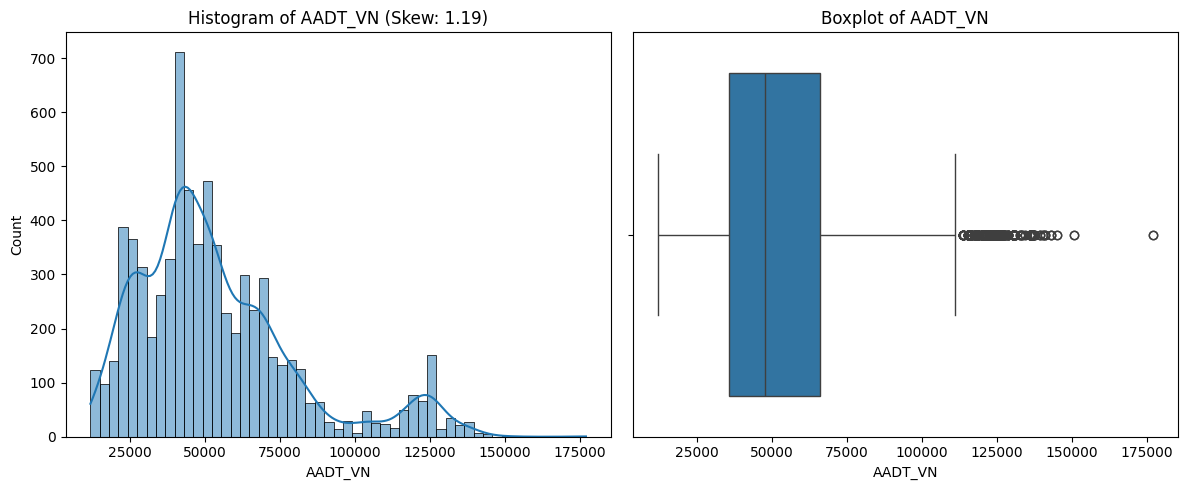

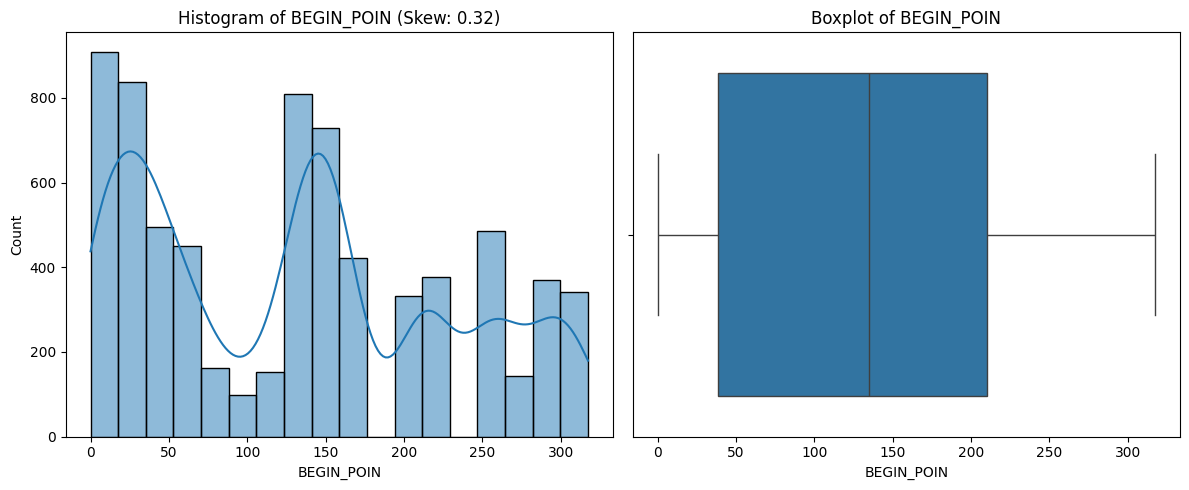

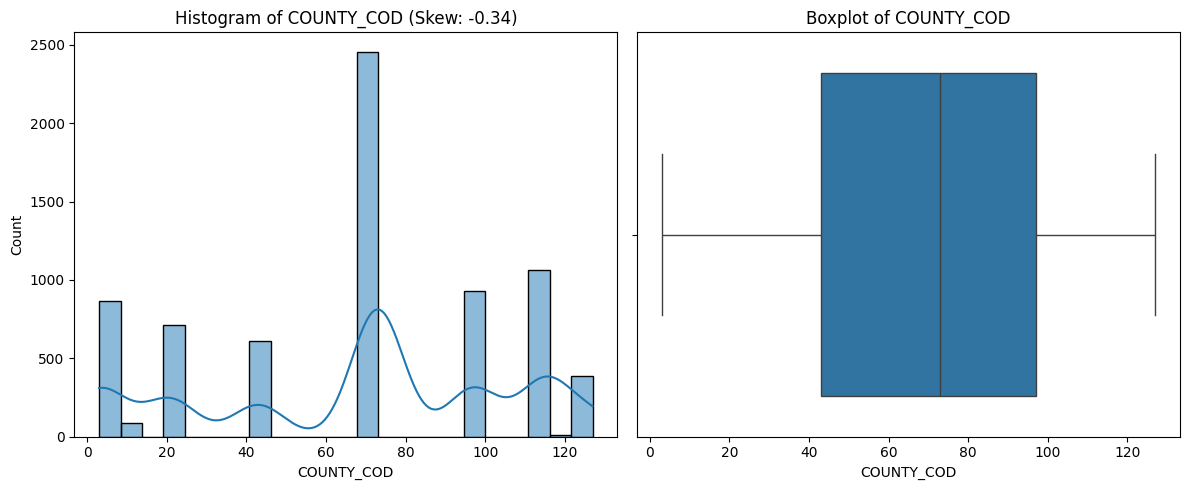

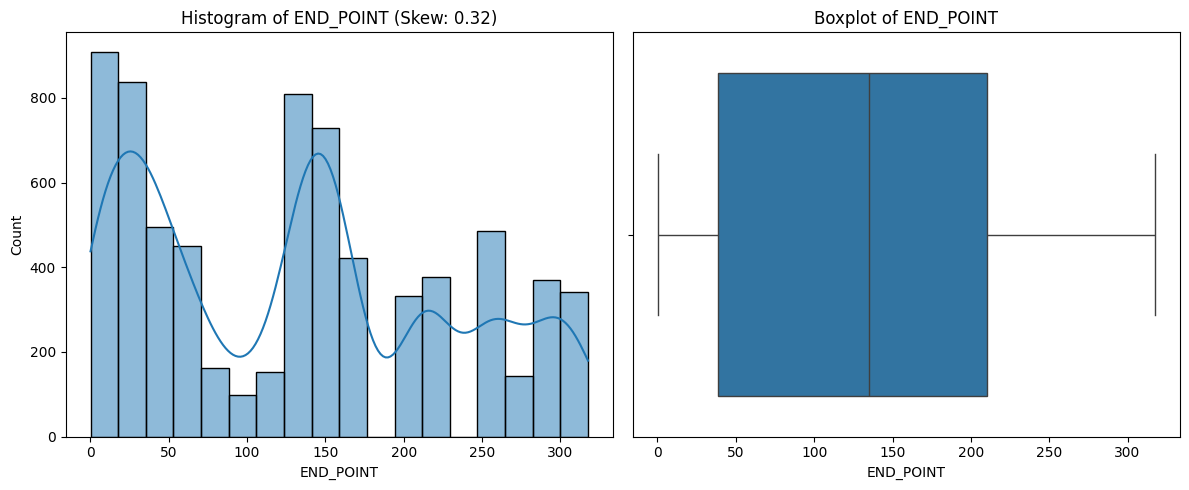

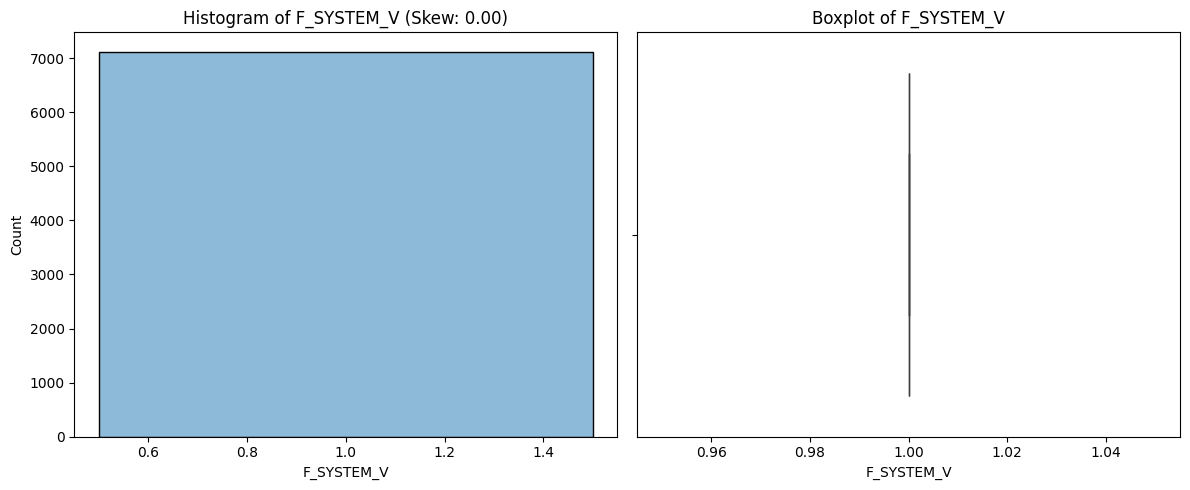

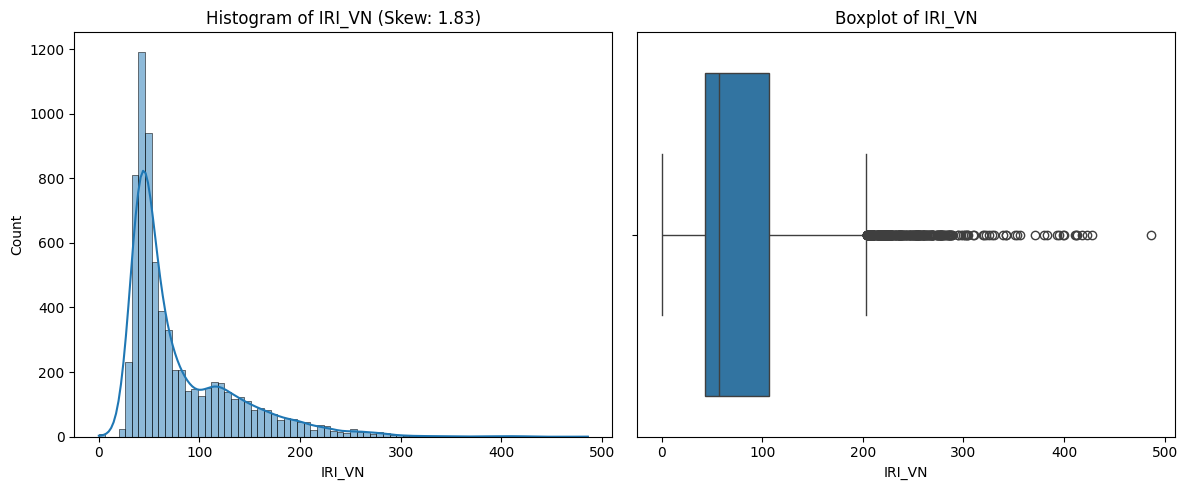

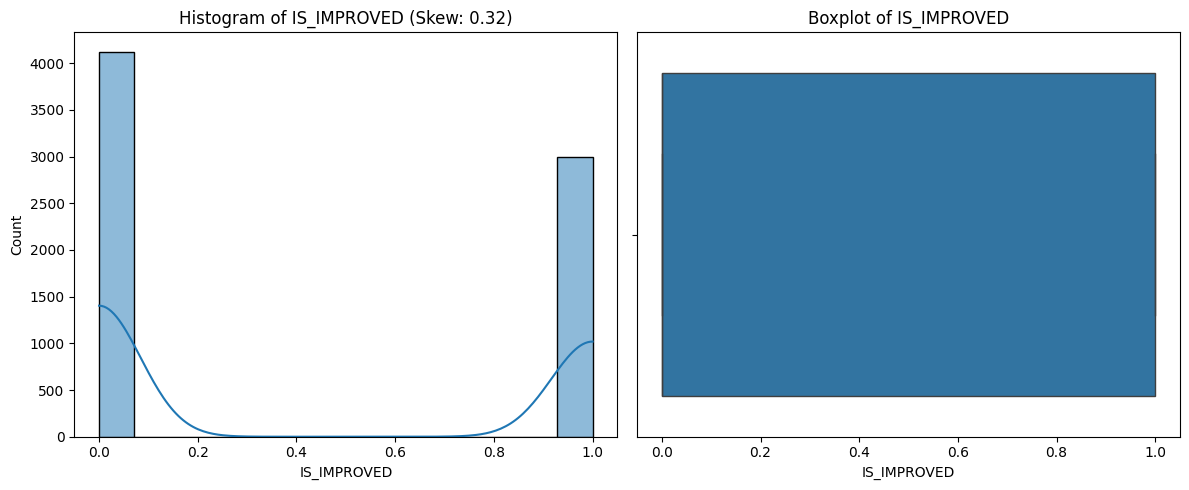

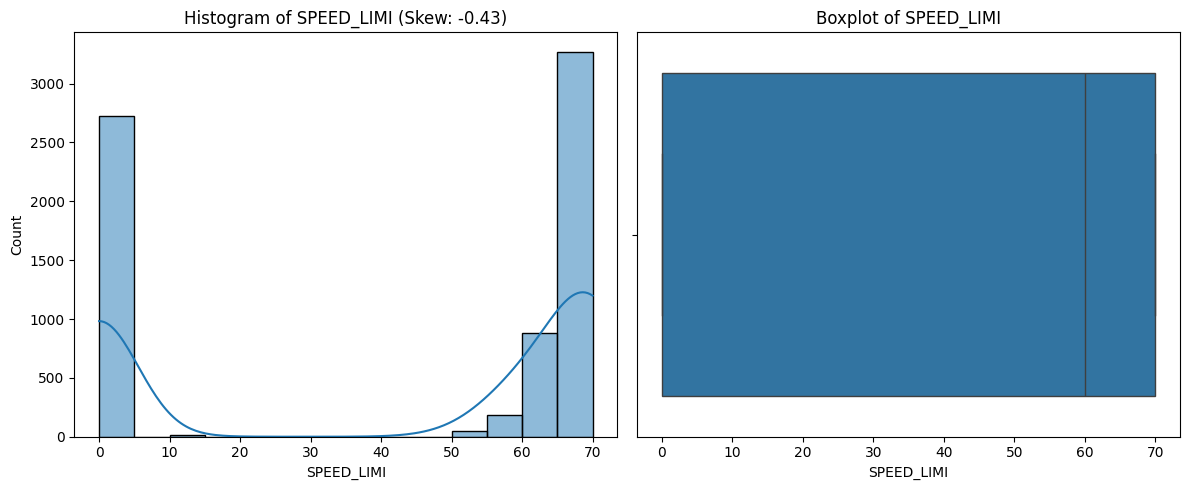

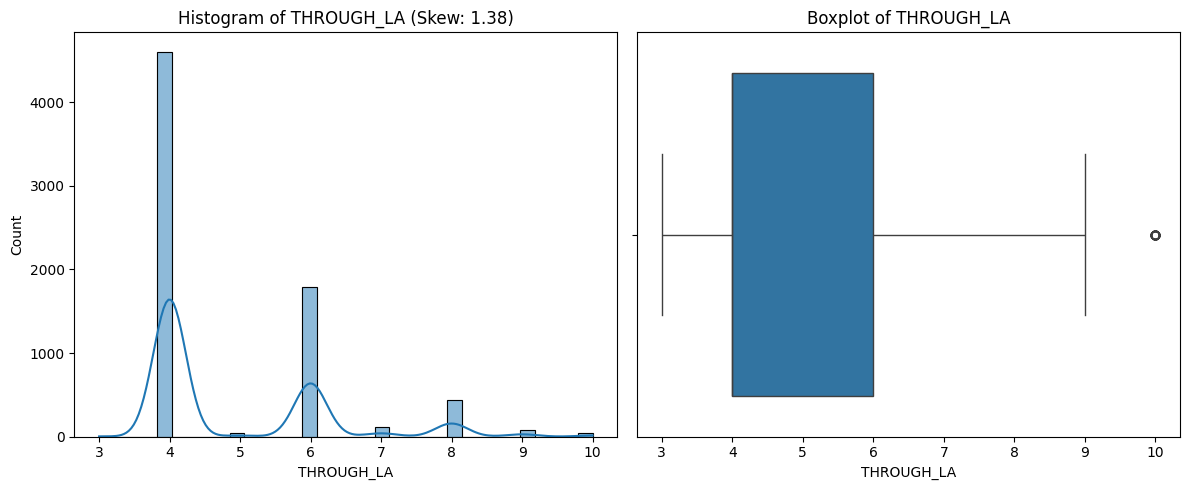

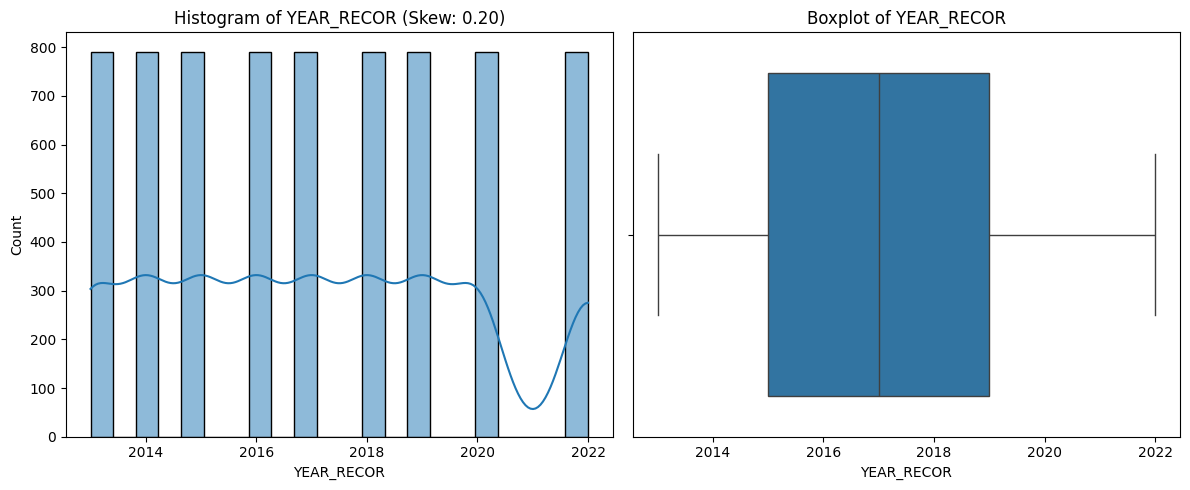

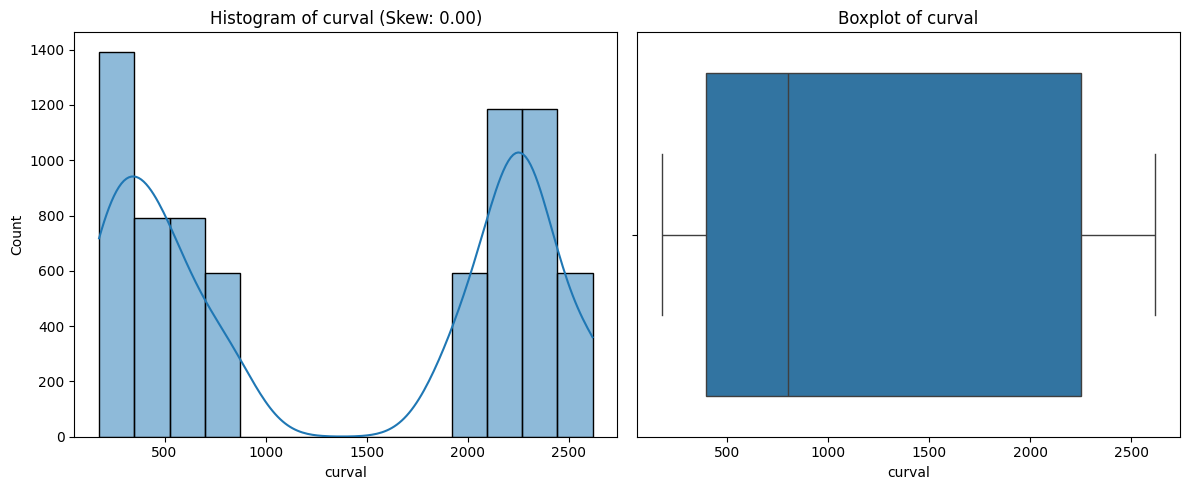

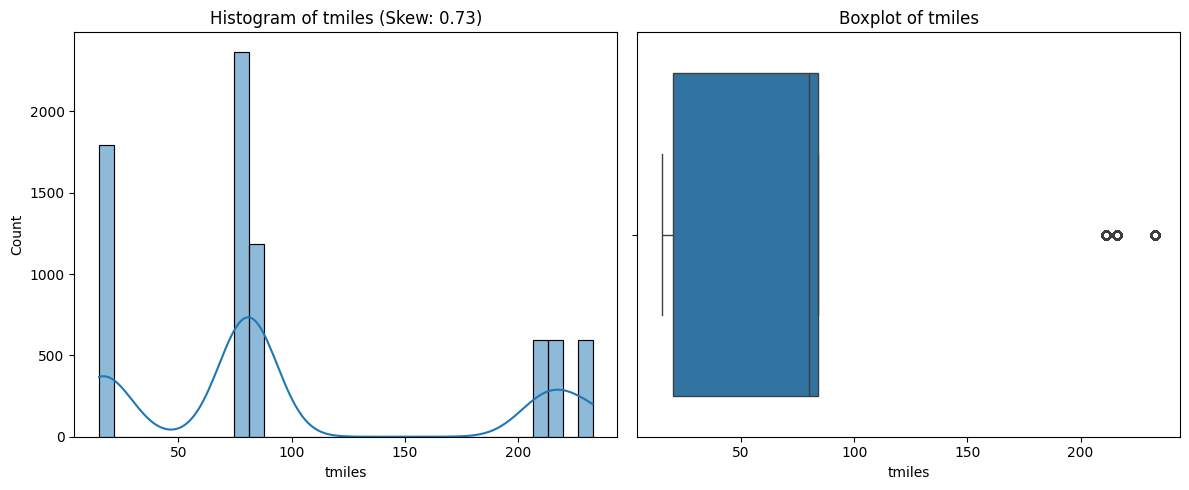

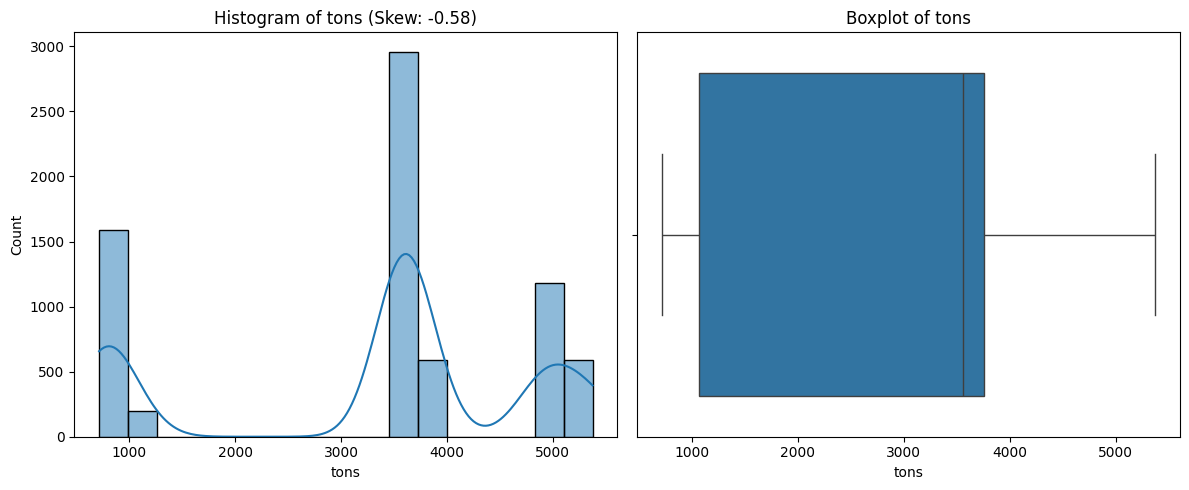

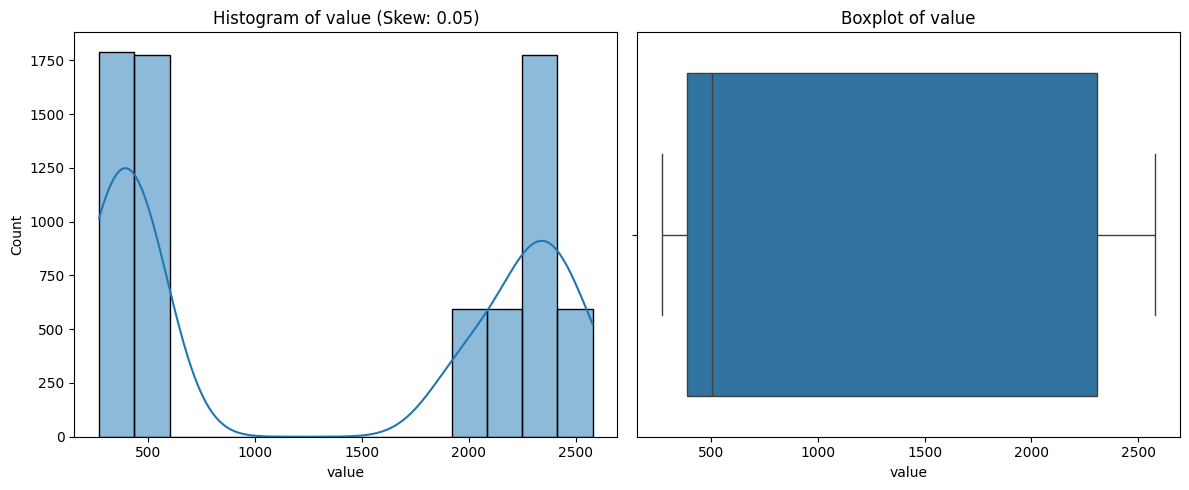

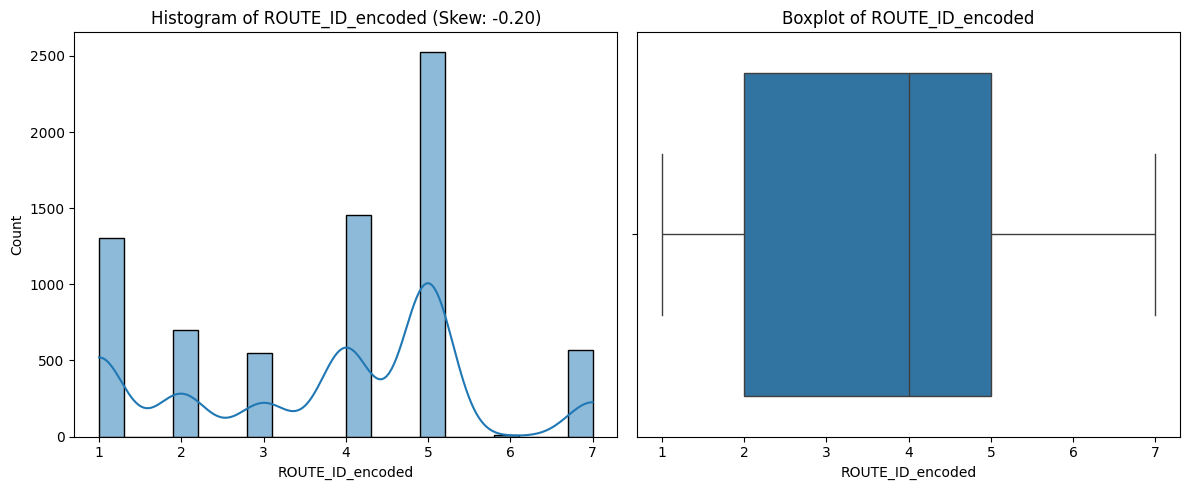

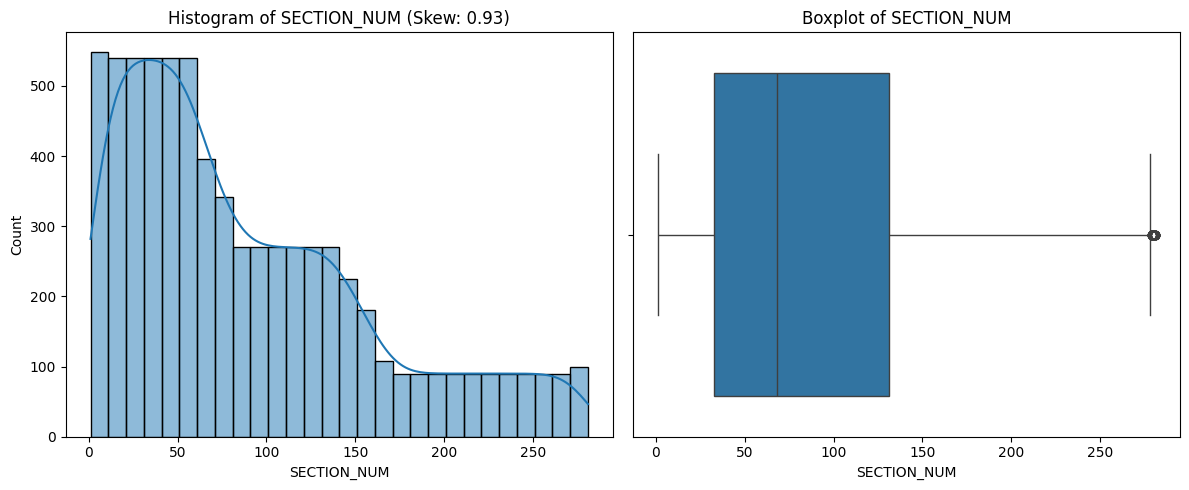

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def display_skewness_graphs(df):

    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col} (Skew: {df[col].skew():.2f})')

            # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()

display_skewness_graphs(df)


In [15]:
# IRI
Q1 = df['IRI_VN'].quantile(0.25)
Q3 = df['IRI_VN'].quantile(0.75)
IQR = Q3 -  Q1

# bounds
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

print(lowerBound, upperBound)

-53.0 203.0


In [16]:
outliers = df[(df['IRI_VN'] < lowerBound) | (df['IRI_VN'] > upperBound)]

outliers.count()

AADT_VN             309
BEGIN_POIN          309
COUNTY_COD          309
END_POINT           309
F_SYSTEM_V          309
IRI_VN              309
IS_IMPROVED         309
ROUTE_ID            309
SPEED_LIMI          309
THROUGH_LA          309
YEAR_RECOR          309
curval              309
geometry_paths      309
tmiles              309
tons                309
value               309
ROUTE_ID_encoded    309
SECTION_NUM         309
dtype: int64

In [17]:
filtered_df = df[(df['IRI_VN'] >= lowerBound) & (df['IRI_VN'] <= upperBound)]

In [18]:
# AADT
Q1_AADT = df['AADT_VN'].quantile(0.25)
Q3_AADT = df['AADT_VN'].quantile(0.75)
IQR = Q3_AADT -  Q1_AADT

# bounds
lowerBound_AADT = Q1_AADT - 1.5 * IQR
upperBound_AADT = Q3_AADT + 1.5 * IQR

print(lowerBound_AADT, upperBound_AADT)

-10060.0 111780.0


In [19]:
outliers_AADT = filtered_df[(filtered_df['AADT_VN'] < lowerBound_AADT) | (filtered_df['AADT_VN'] > upperBound_AADT)]

outliers_AADT.count()

AADT_VN             391
BEGIN_POIN          391
COUNTY_COD          391
END_POINT           391
F_SYSTEM_V          391
IRI_VN              391
IS_IMPROVED         391
ROUTE_ID            391
SPEED_LIMI          391
THROUGH_LA          391
YEAR_RECOR          391
curval              391
geometry_paths      391
tmiles              391
tons                391
value               391
ROUTE_ID_encoded    391
SECTION_NUM         391
dtype: int64

In [20]:
filtered_df = filtered_df[(filtered_df['AADT_VN'] >= lowerBound_AADT) & (filtered_df['AADT_VN'] <= upperBound_AADT)]

In [21]:
filtered_df.describe()

,AADT_VN,BEGIN_POIN,COUNTY_COD,END_POINT,F_SYSTEM_V,IRI_VN,IS_IMPROVED,SPEED_LIMI,THROUGH_LA,YEAR_RECOR,curval,tmiles,tons,value,ROUTE_ID_encoded,SECTION_NUM
count,6419.000000,6419.000000,6419.000000,6419.000000,6419.0,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000,6419.000000
mean,47994.026640,124.073890,67.653996,124.173921,1.0,69.767409,0.427325,42.141158,4.763203,2017.128992,1310.483876,96.957158,3201.937218,1302.292881,3.679857,86.071195
std,19443.525935,95.412395,40.116398,95.412354,0.0,39.644973,0.494729,32.446295,1.276271,2.768439,944.562534,74.782490,1591.453504,963.098876,1.824195,71.252078
min,11840.000000,0.000000,3.000000,0.100000,1.0,0.000000,0.000000,0.000000,3.000000,2013.000000,176.000000,15.000000,716.000000,270.000000,1.000000,1.000000
25%,33815.000000,32.900000,21.000000,33.000000,1.0,42.000000,0.000000,0.000000,4.000000,2015.000000,396.000000,20.000000,1070.000000,390.000000,2.000000,32.000000
50%,45380.000000,133.000000,73.000000,133.100000,1.0,53.000000,0.000000,60.000000,4.000000,2017.000000,803.000000,80.000000,3558.000000,505.000000,4.000000,64.000000
75%,60670.000000,203.900000,97.000000,204.000000,1.0,85.000000,1.000000,70.000000,6.000000,2019.000000,2253.000000,84.000000,3755.000000,2307.000000,5.000000,121.000000
max,111040.000000,317.500000,127.000000,317.600000,1.0,203.000000,1.000000,70.000000,10.000000,2022.000000,2619.000000,233.000000,5375.000000,2580.000000,7.000000,281.000000


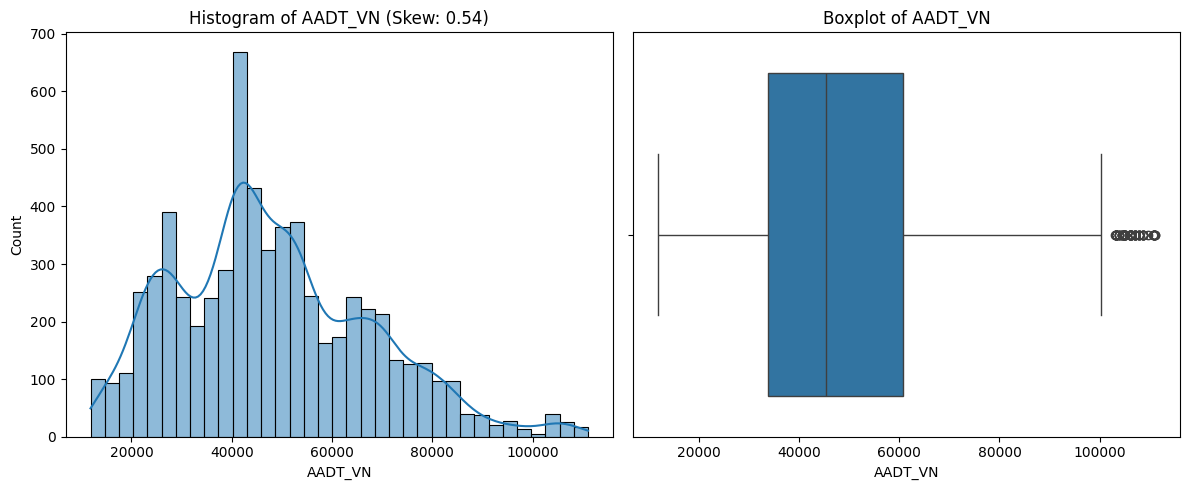

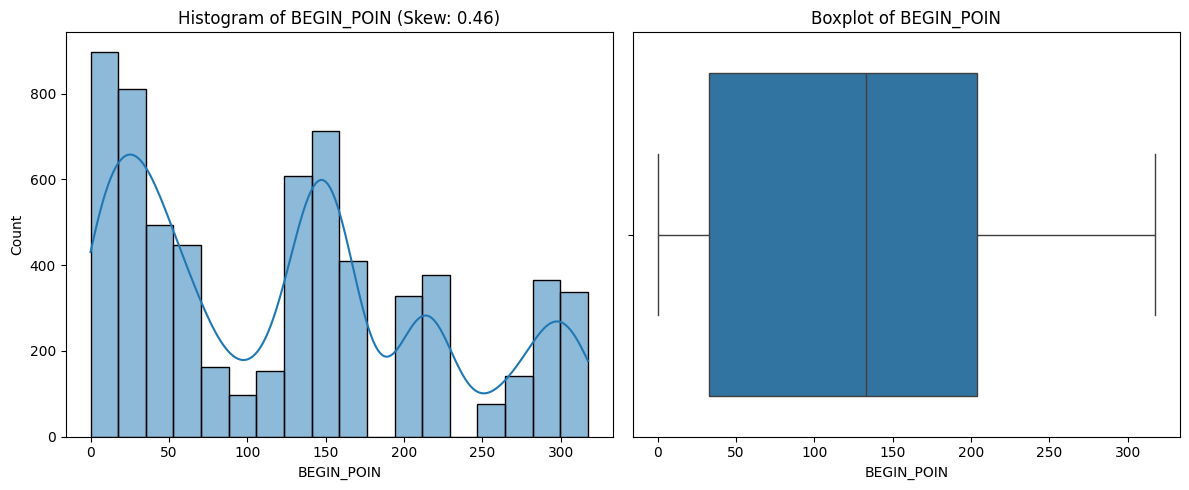

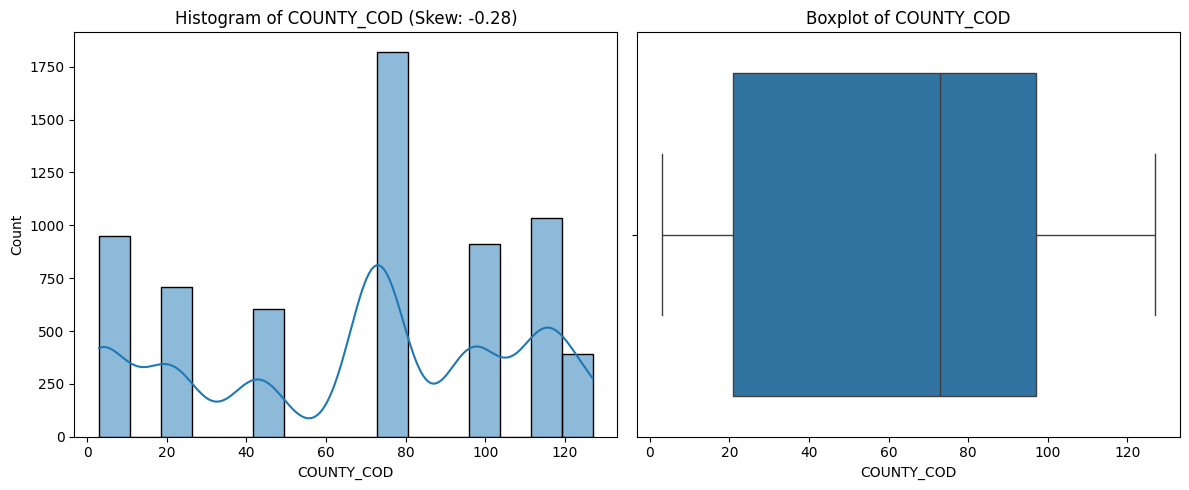

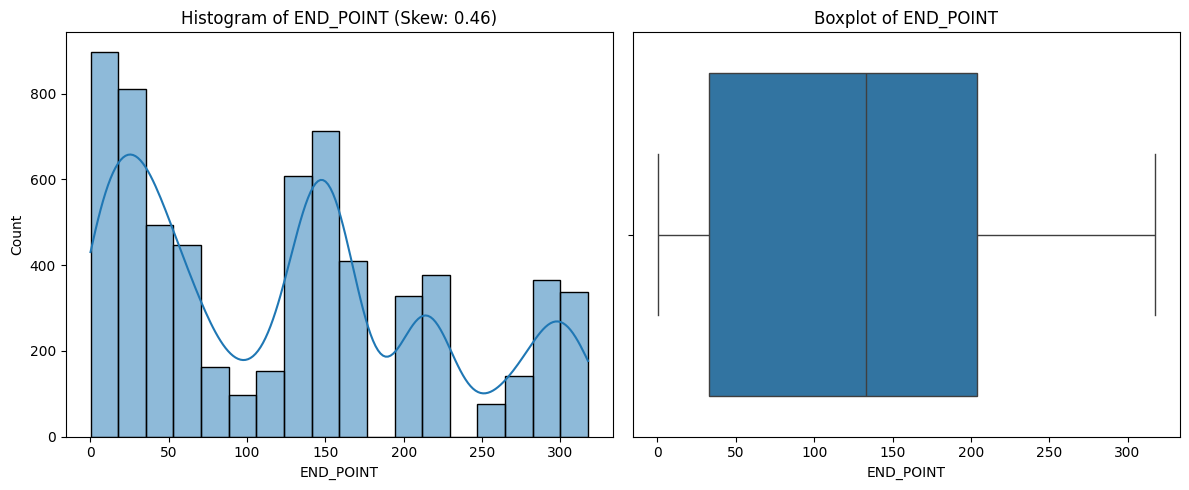

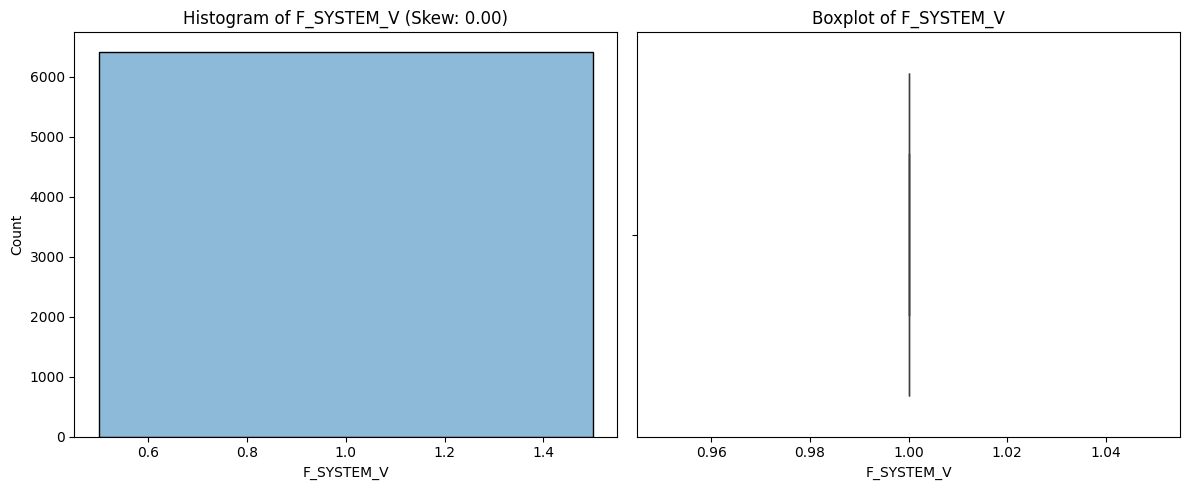

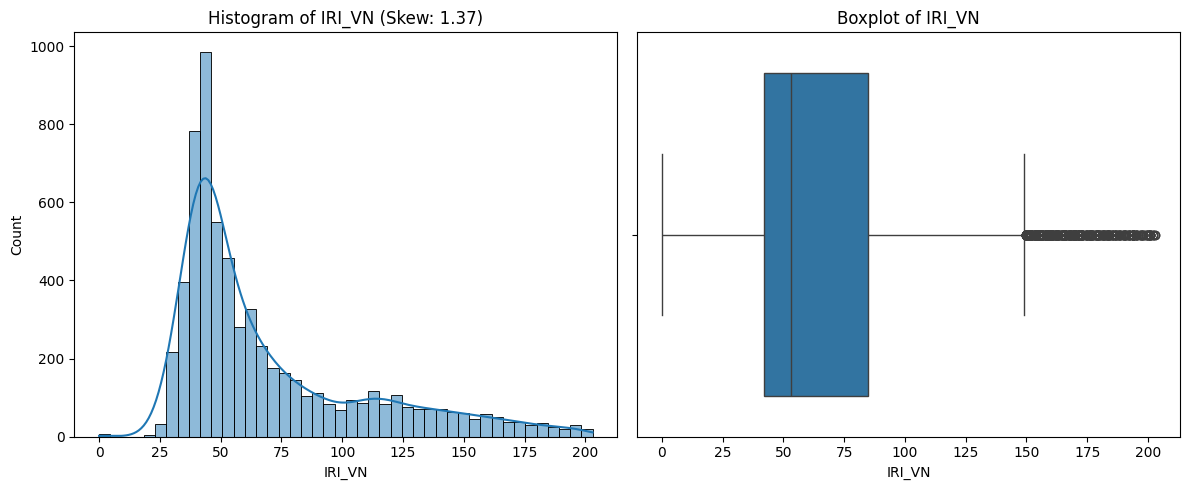

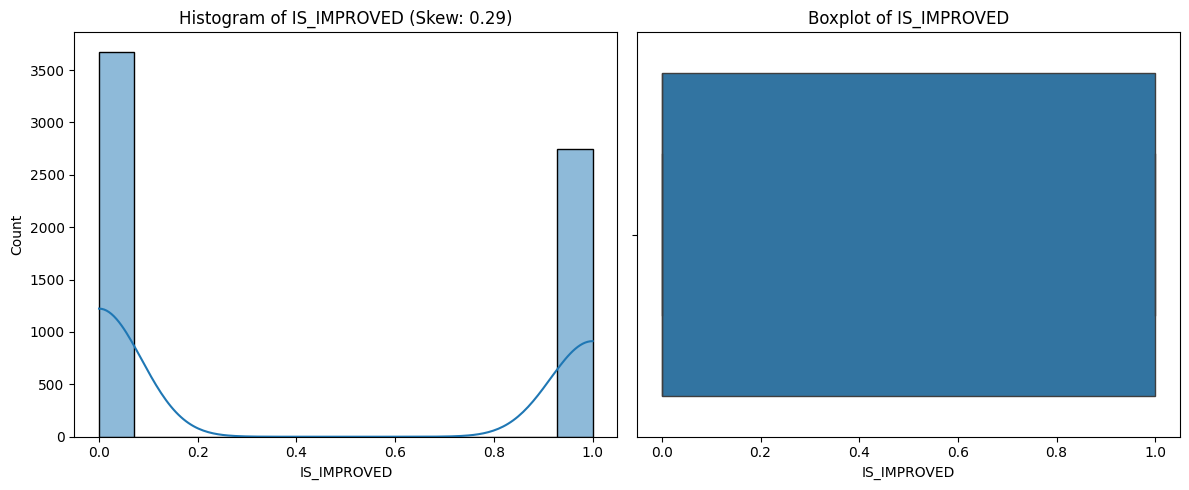

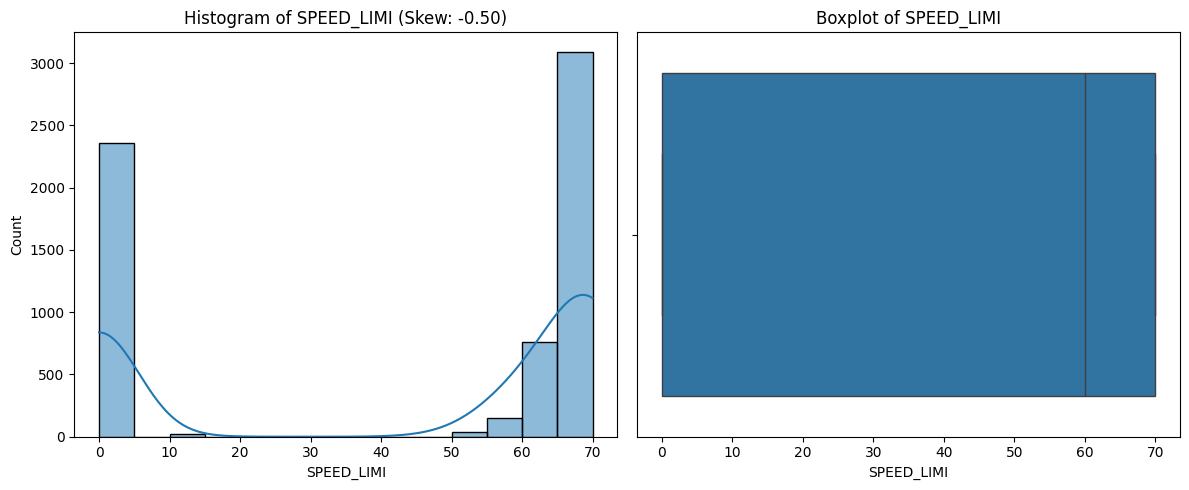

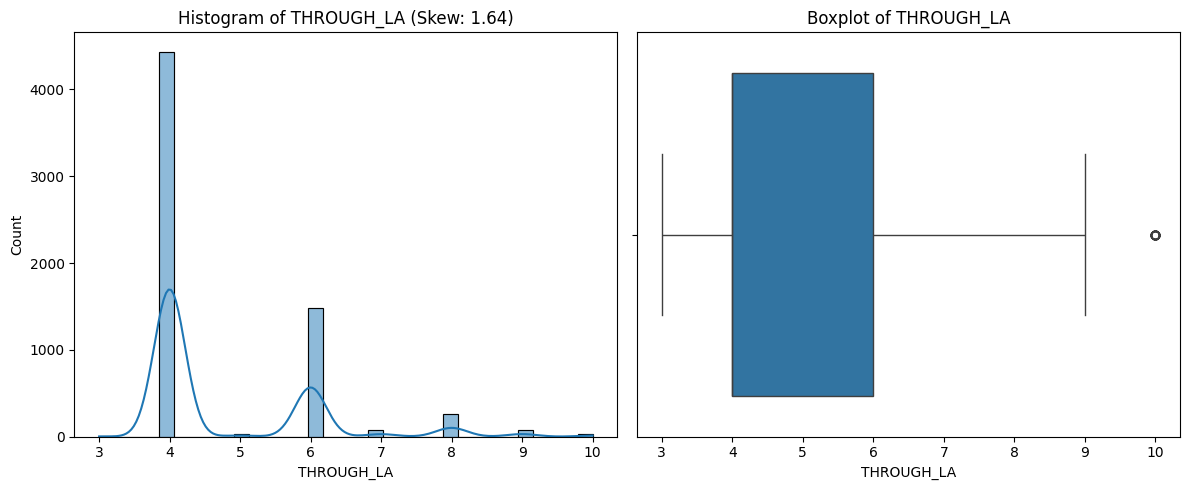

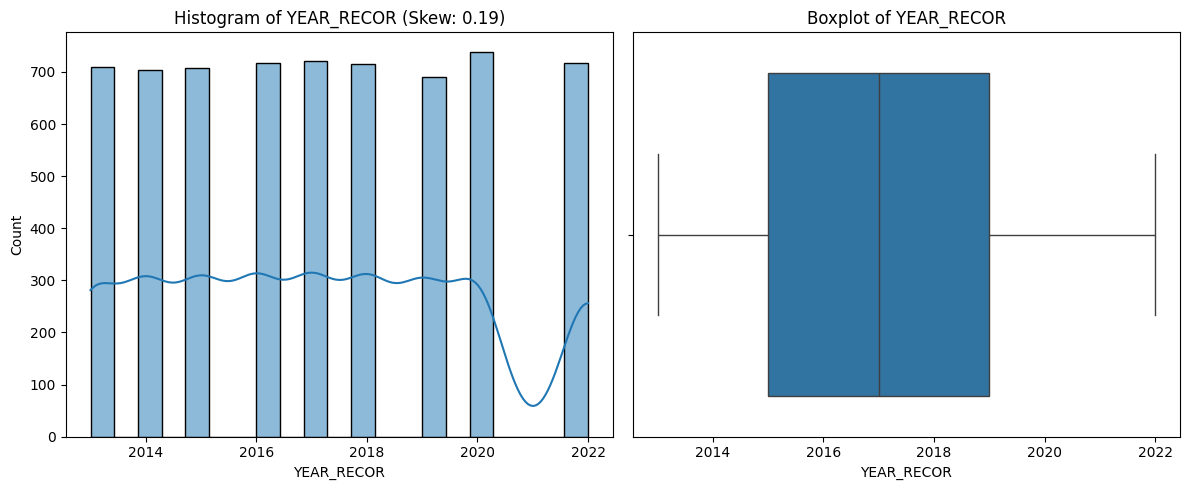

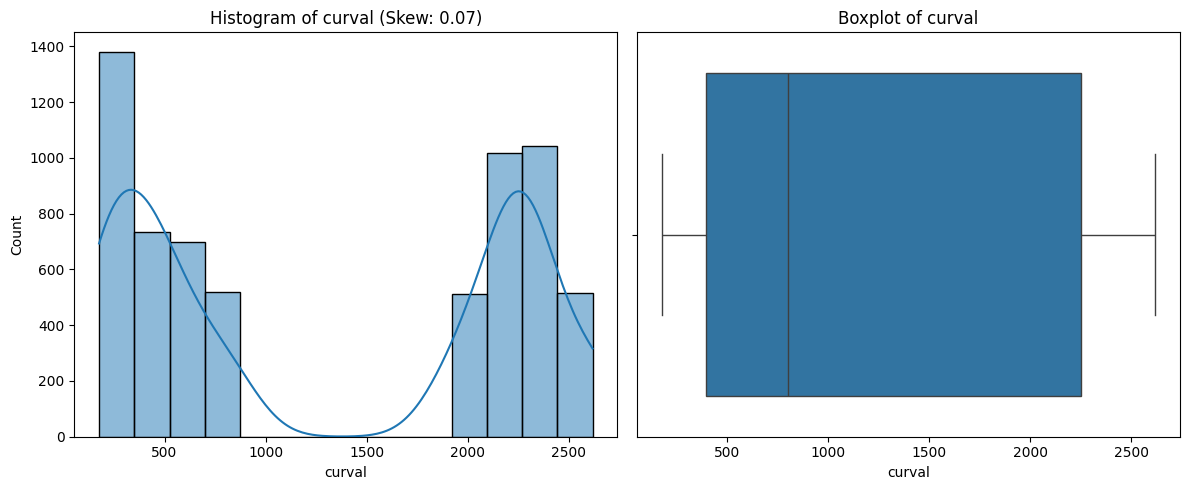

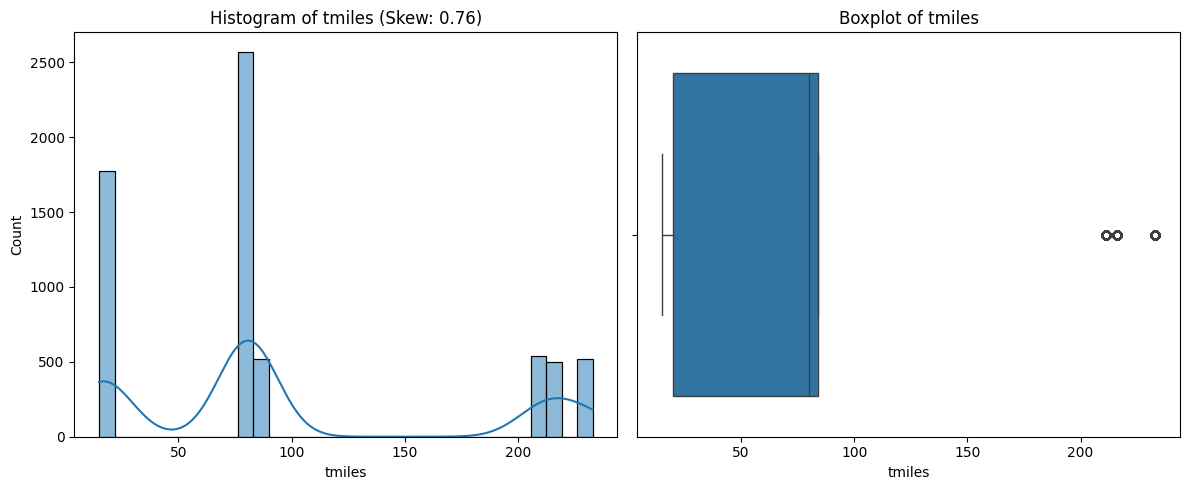

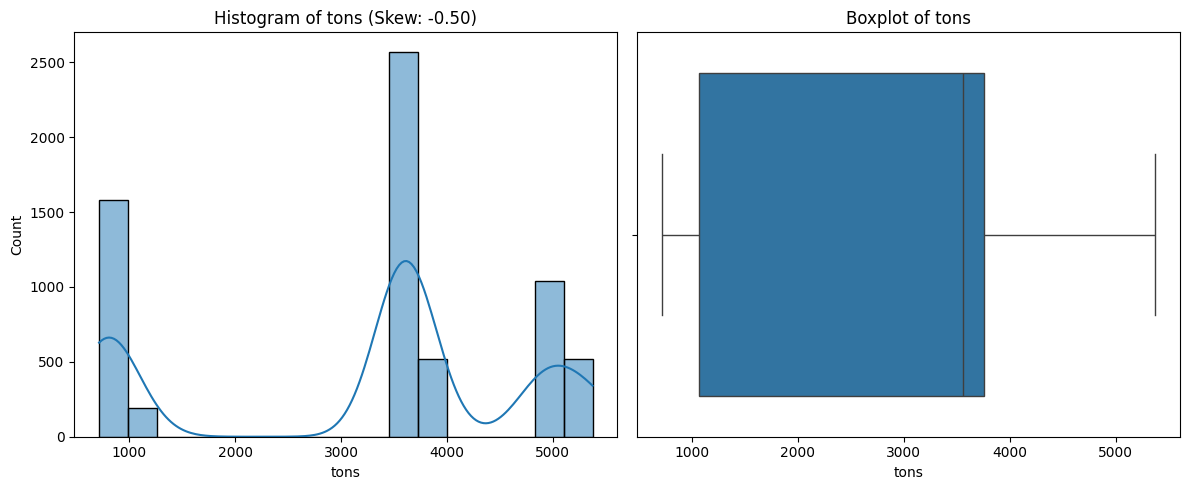

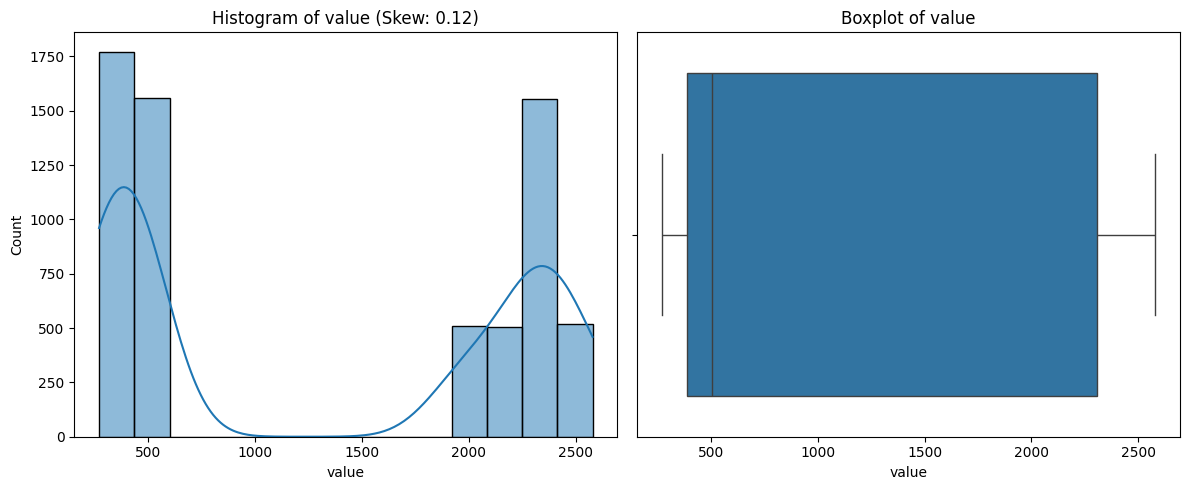

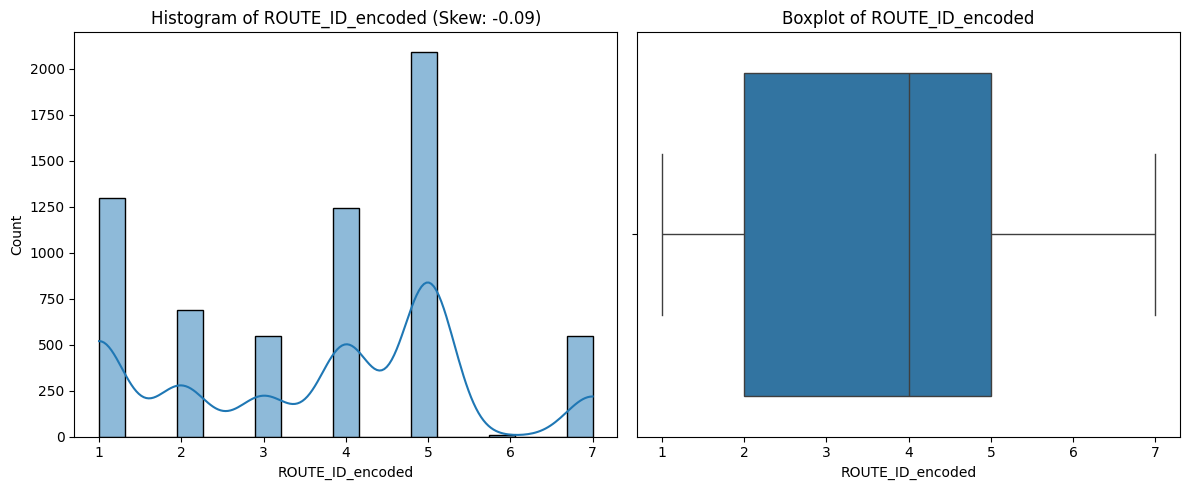

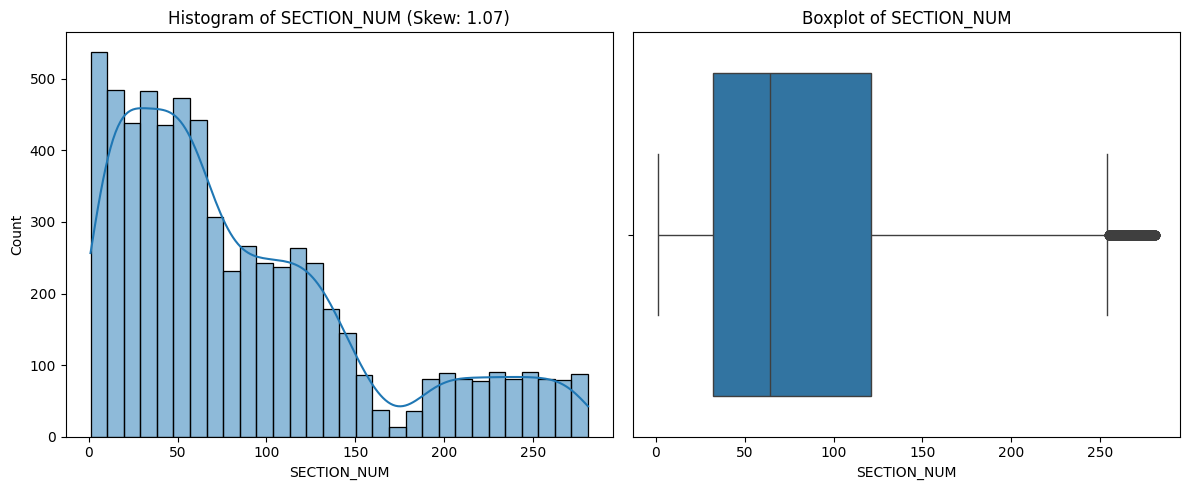

In [22]:
display_skewness_graphs(filtered_df)


In [23]:
# IRI
Q1 = filtered_df['IRI_VN'].quantile(0.25)
Q3 = filtered_df['IRI_VN'].quantile(0.75)
IQR = Q3 -  Q1

# bounds
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

print(lowerBound, upperBound)

-22.5 149.5


In [24]:
outliers = filtered_df[(filtered_df['IRI_VN'] < lowerBound) | (filtered_df['IRI_VN'] > upperBound)]

outliers.count()

AADT_VN             424
BEGIN_POIN          424
COUNTY_COD          424
END_POINT           424
F_SYSTEM_V          424
IRI_VN              424
IS_IMPROVED         424
ROUTE_ID            424
SPEED_LIMI          424
THROUGH_LA          424
YEAR_RECOR          424
curval              424
geometry_paths      424
tmiles              424
tons                424
value               424
ROUTE_ID_encoded    424
SECTION_NUM         424
dtype: int64

In [25]:
filtered_df = filtered_df[(filtered_df['IRI_VN'] >= lowerBound) & (filtered_df['IRI_VN'] <= upperBound)]

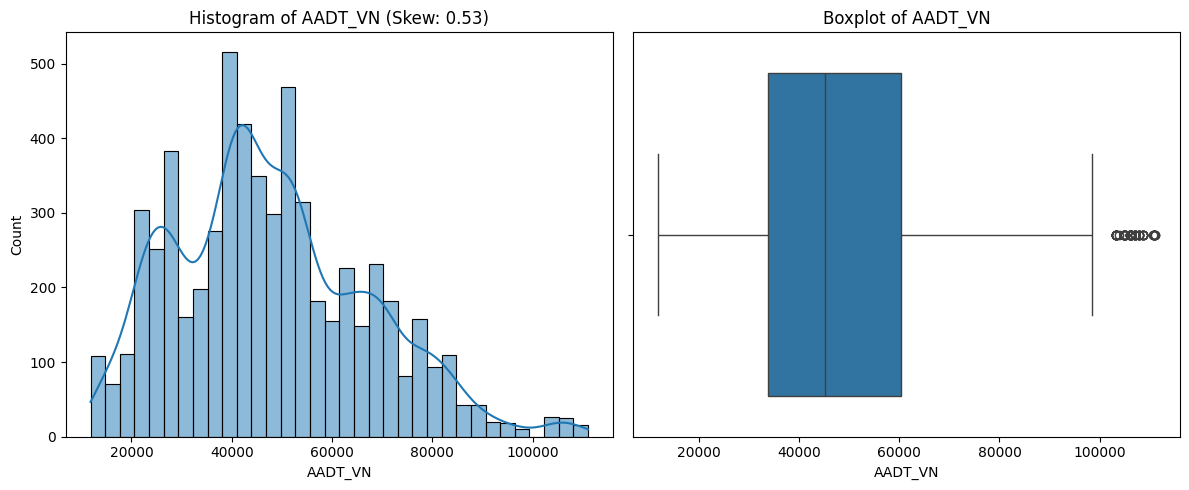

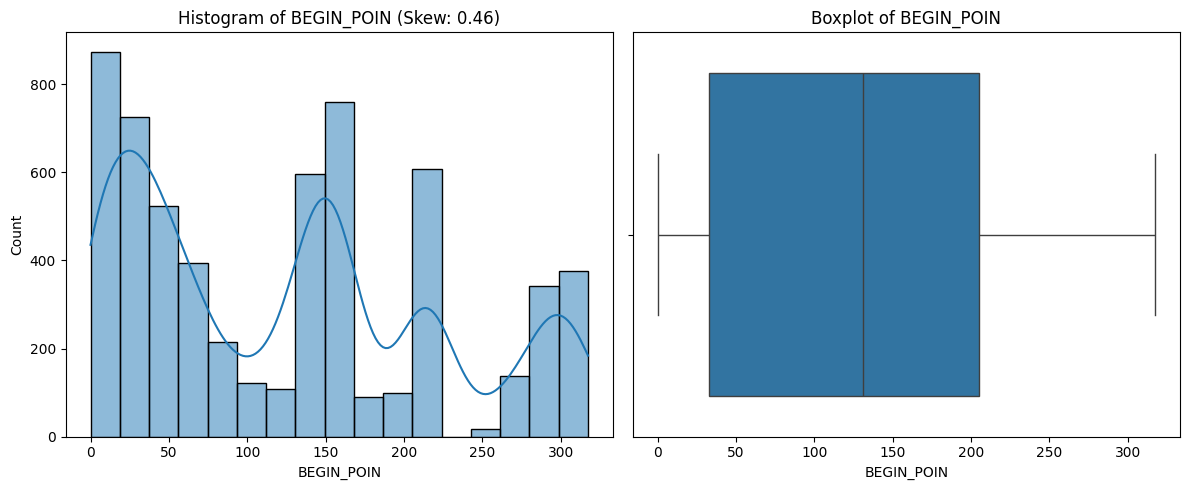

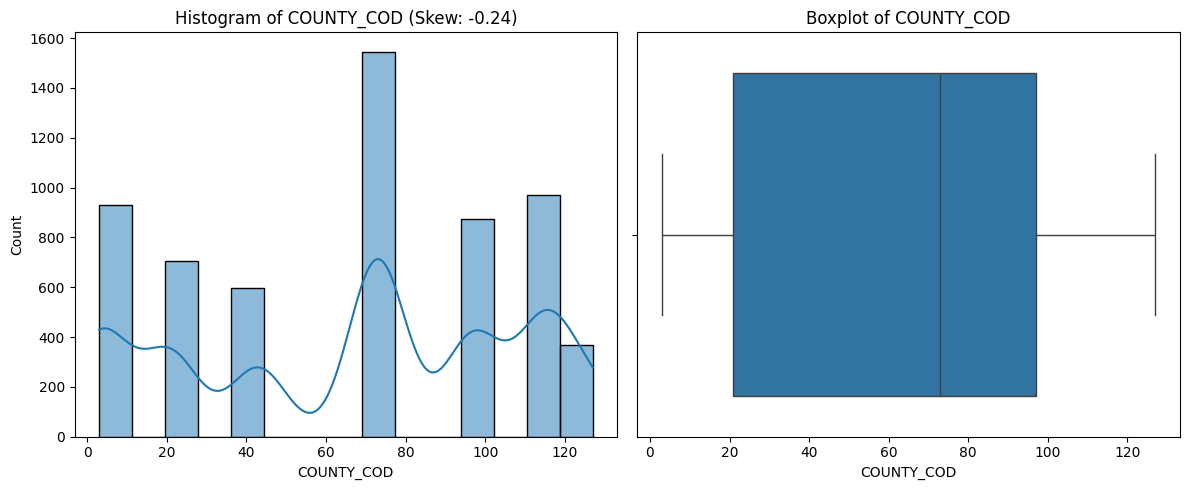

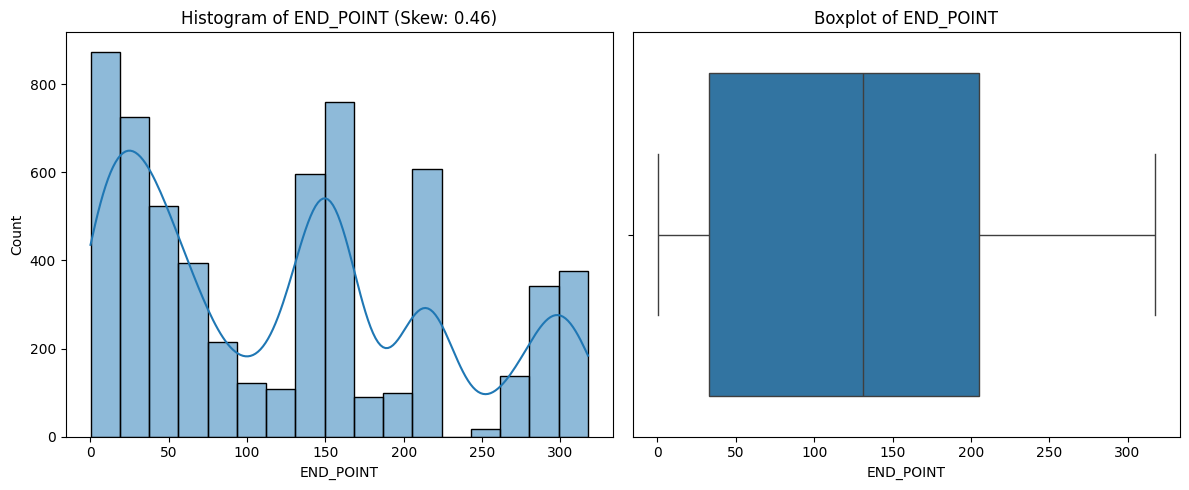

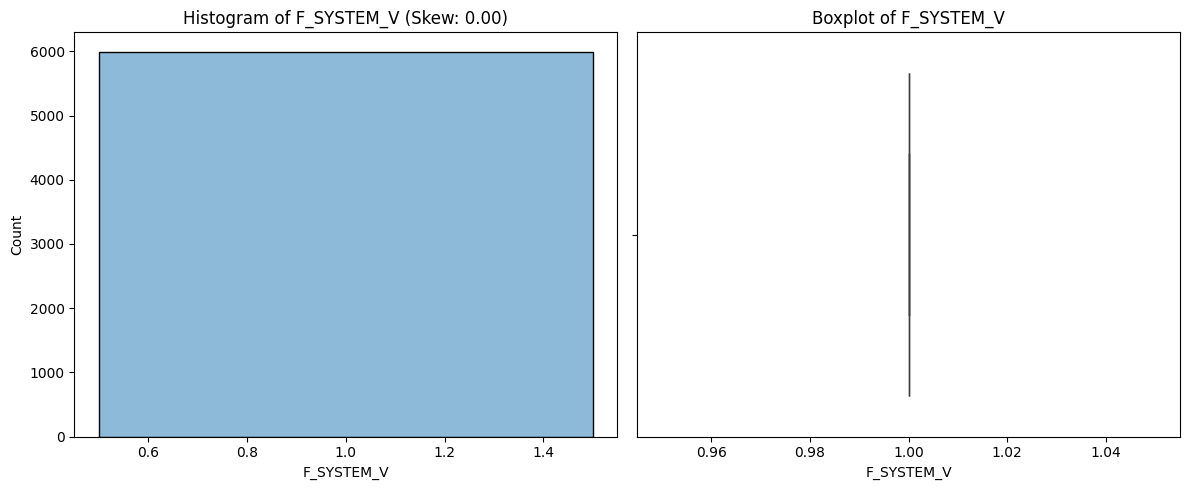

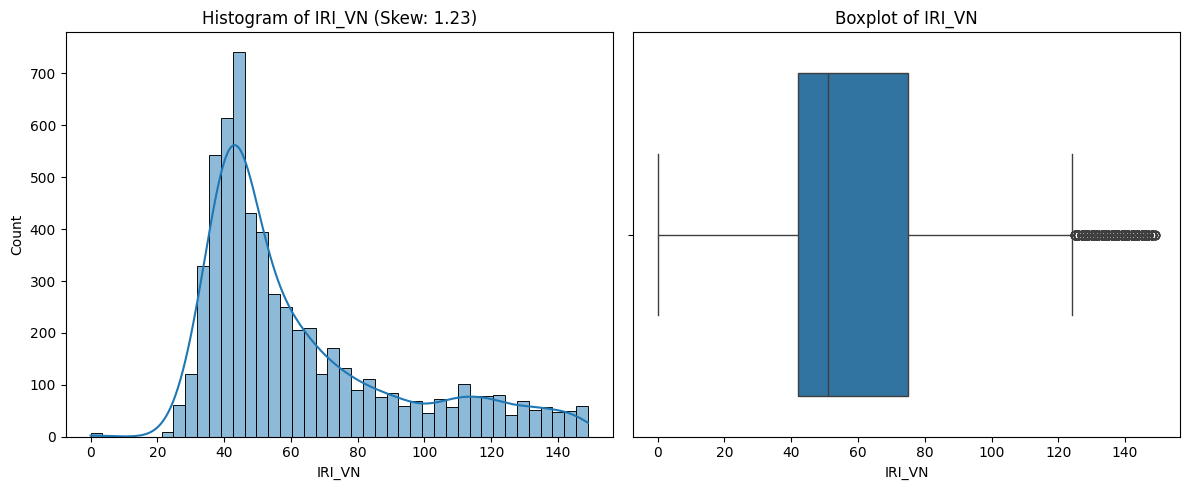

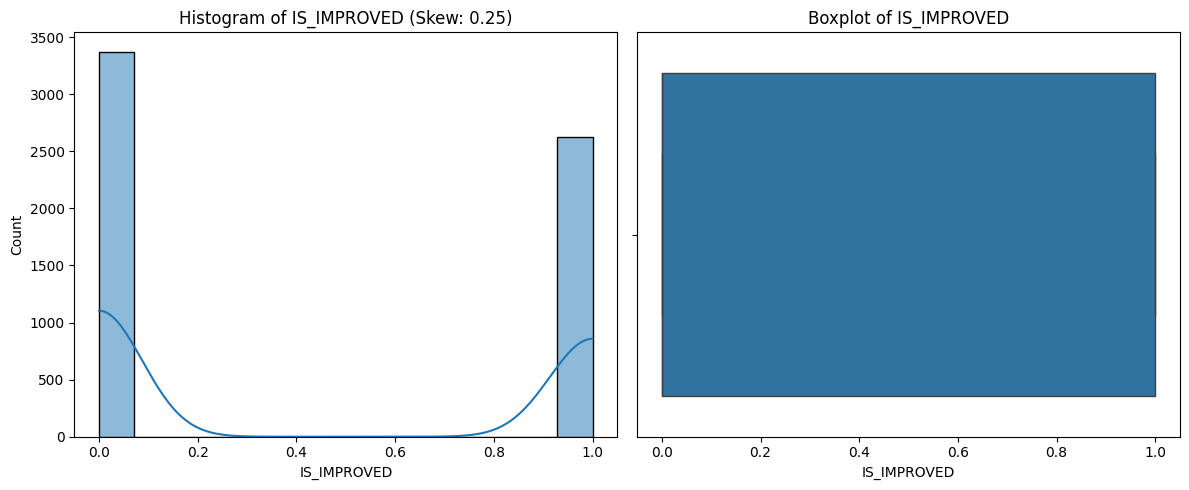

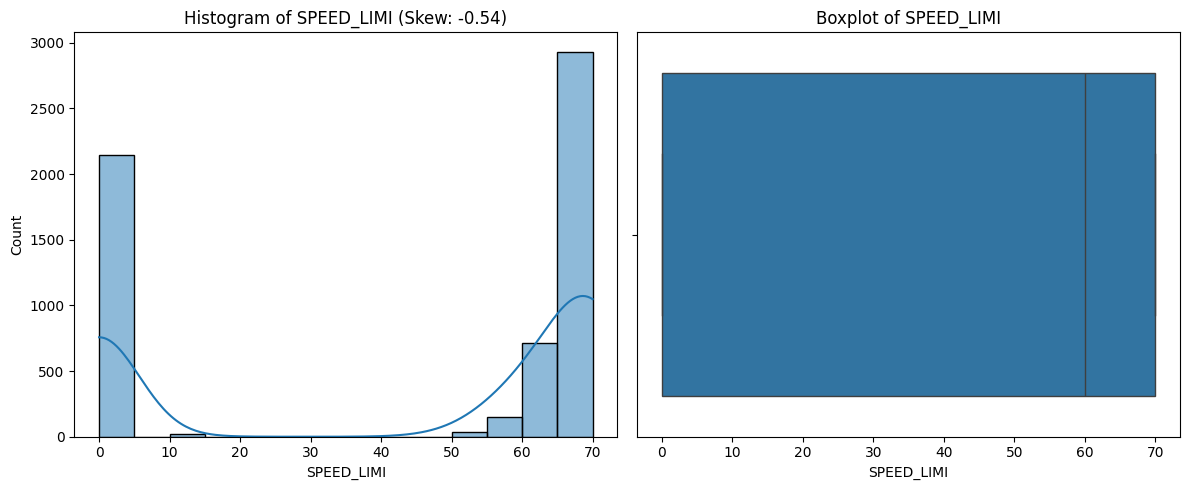

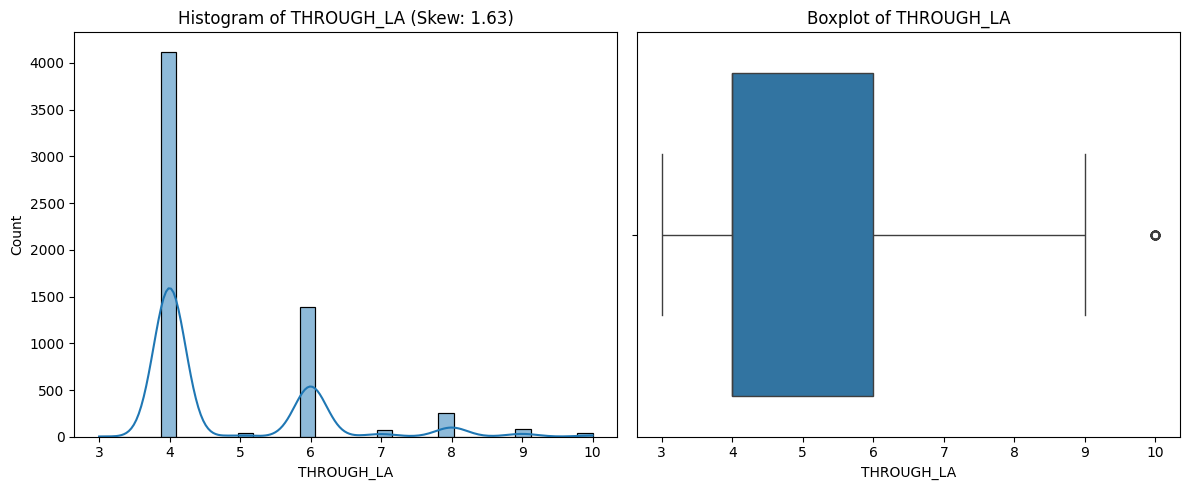

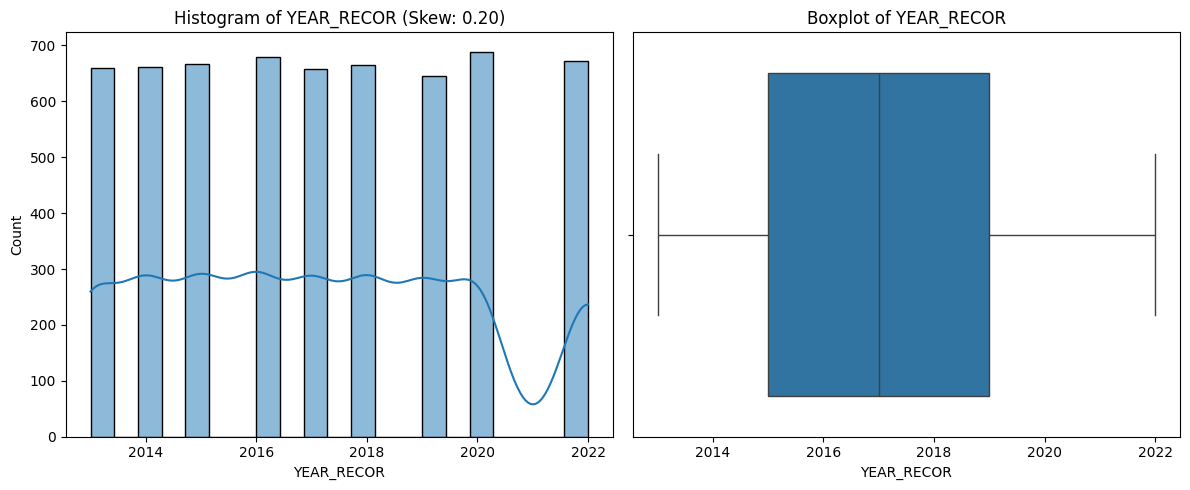

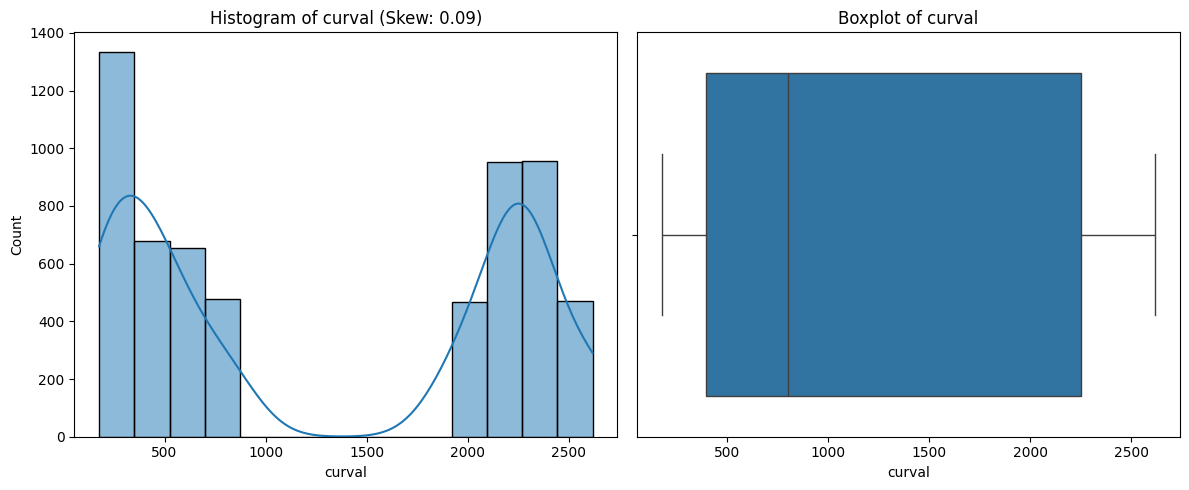

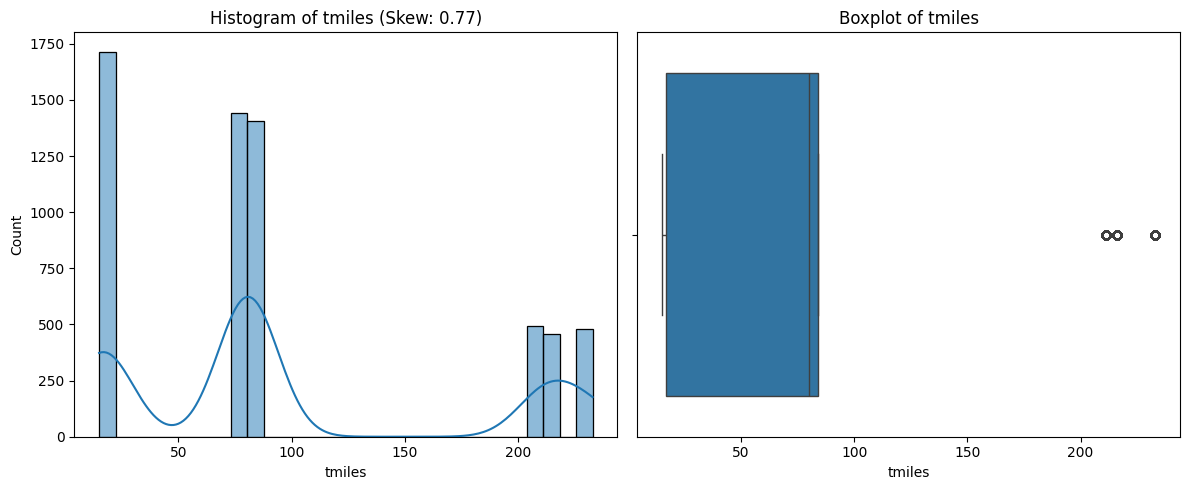

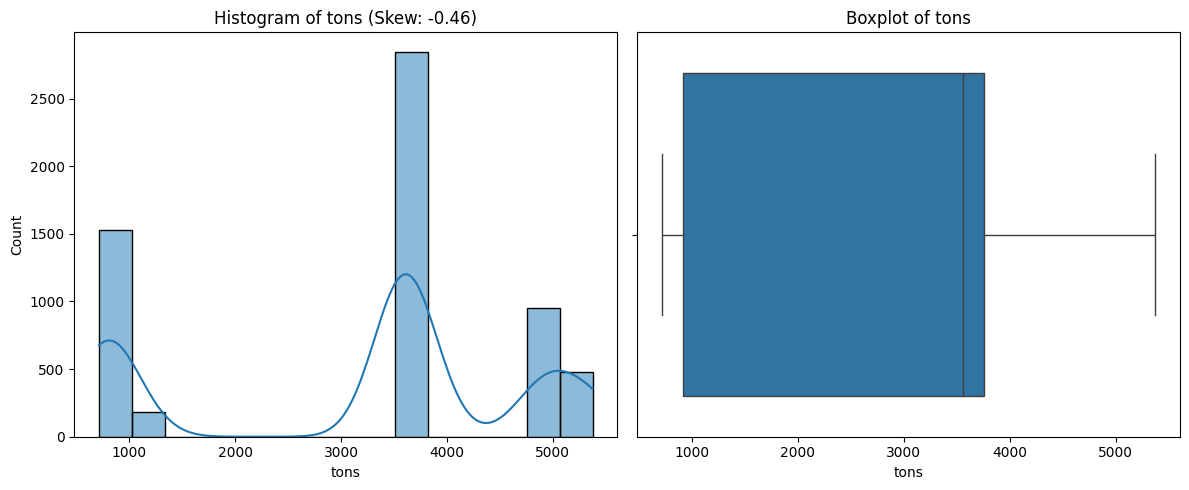

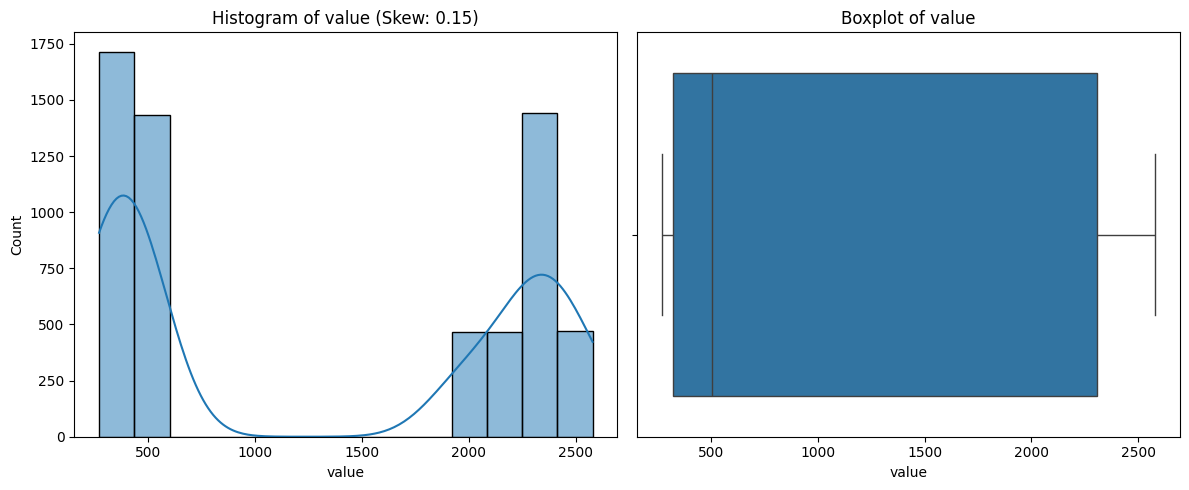

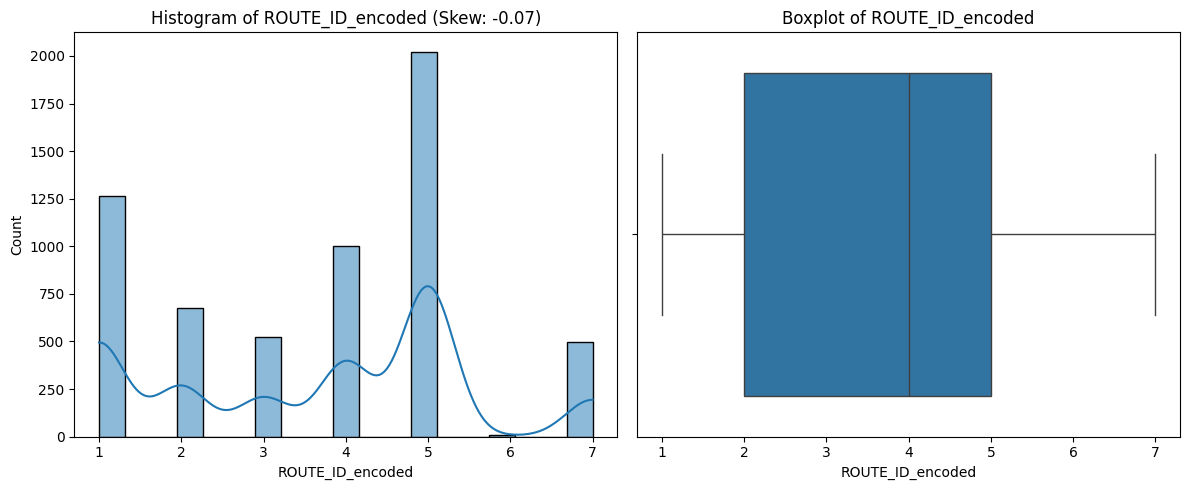

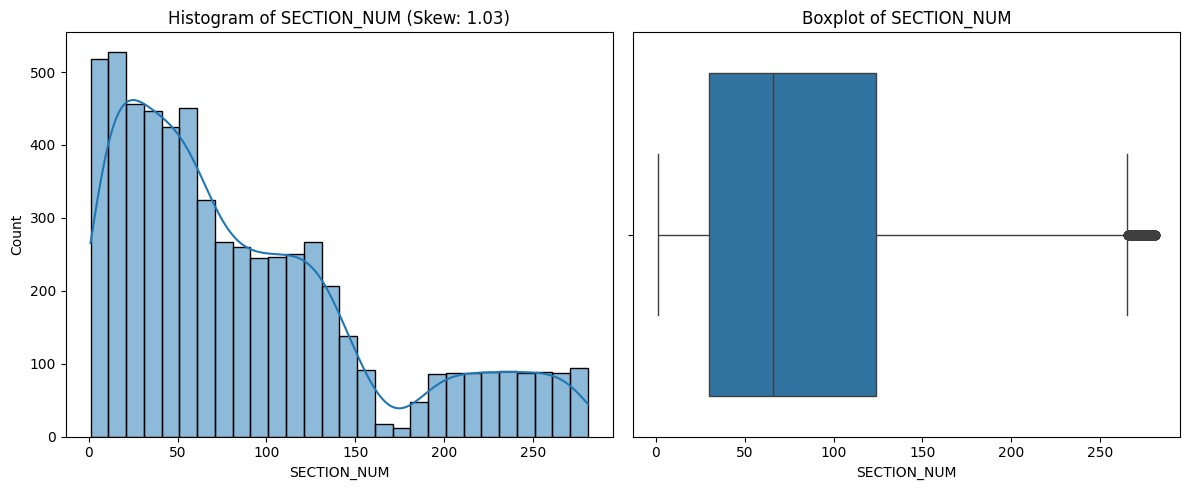

In [26]:
display_skewness_graphs(filtered_df)

AADT_VN             9
BEGIN_POIN          9
COUNTY_COD          9
END_POINT           9
F_SYSTEM_V          9
IRI_VN              9
IS_IMPROVED         9
ROUTE_ID            9
SPEED_LIMI          9
THROUGH_LA          9
YEAR_RECOR          9
curval              9
geometry_paths      9
tmiles              9
tons                9
value               9
ROUTE_ID_encoded    9
SECTION_NUM         9
dtype: int64


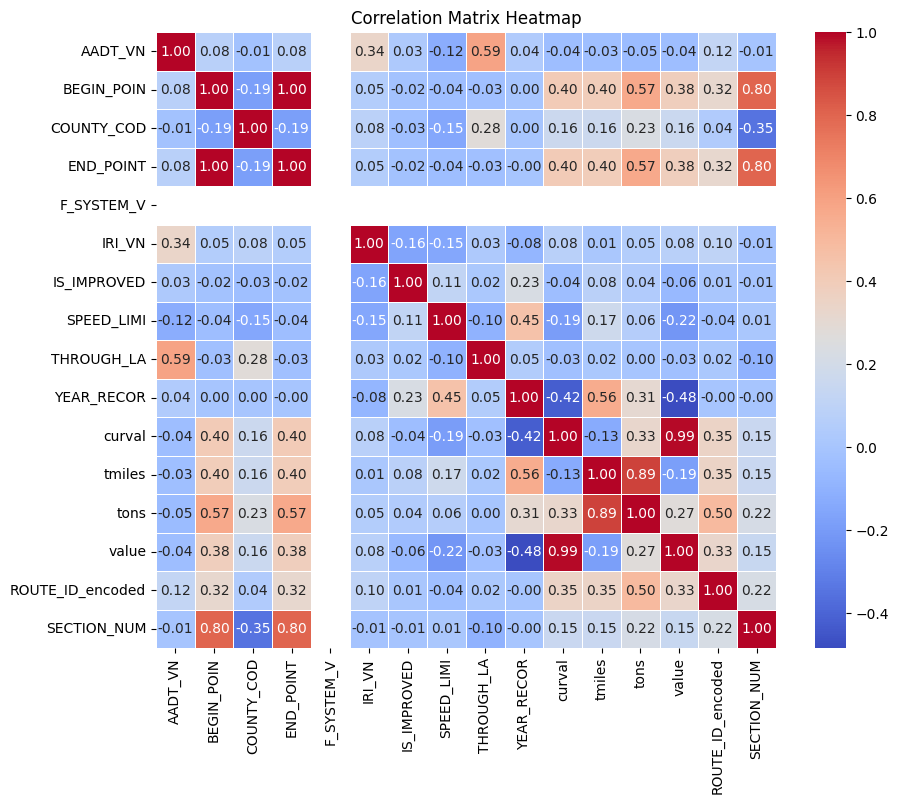

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the data where 'begin_poin' is 317.5
Model_df = filtered_df[(filtered_df['ROUTE_ID'] == 'IN0000100000') & (filtered_df['BEGIN_POIN'] == 38.3)]
print(Model_df.count())

# Select only the columns with numeric (int and float) data types
numeric_columns = filtered_df.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [28]:
from scipy.stats import spearmanr, kendalltau
import dcor

def display_correlation_matrices(df):

    numeric_cols = df.select_dtypes(include=np.number).columns

    # Spearman Correlation Matrix
    spearman_matrix = df[numeric_cols].corr(method='spearman')
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Spearman Correlation Matrix")
    plt.show()

    # Kendall Correlation Matrix
    kendall_matrix = df[numeric_cols].corr(method='kendall')
    plt.figure(figsize=(10, 8))
    sns.heatmap(kendall_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Kendall Correlation Matrix")
    plt.show()

    # Distance Correlation Matrix
    distance_matrix = np.zeros((len(numeric_cols), len(numeric_cols)))
    for i, col1 in enumerate(numeric_cols):
        for j, col2 in enumerate(numeric_cols):
            distance_matrix[i, j] = dcor.distance_correlation(df[col1], df[col2])

    distance_df = pd.DataFrame(distance_matrix, index=numeric_cols, columns=numeric_cols)
    plt.figure(figsize=(10, 8))
    sns.heatmap(distance_df, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Distance Correlation Matrix")
    plt.show()



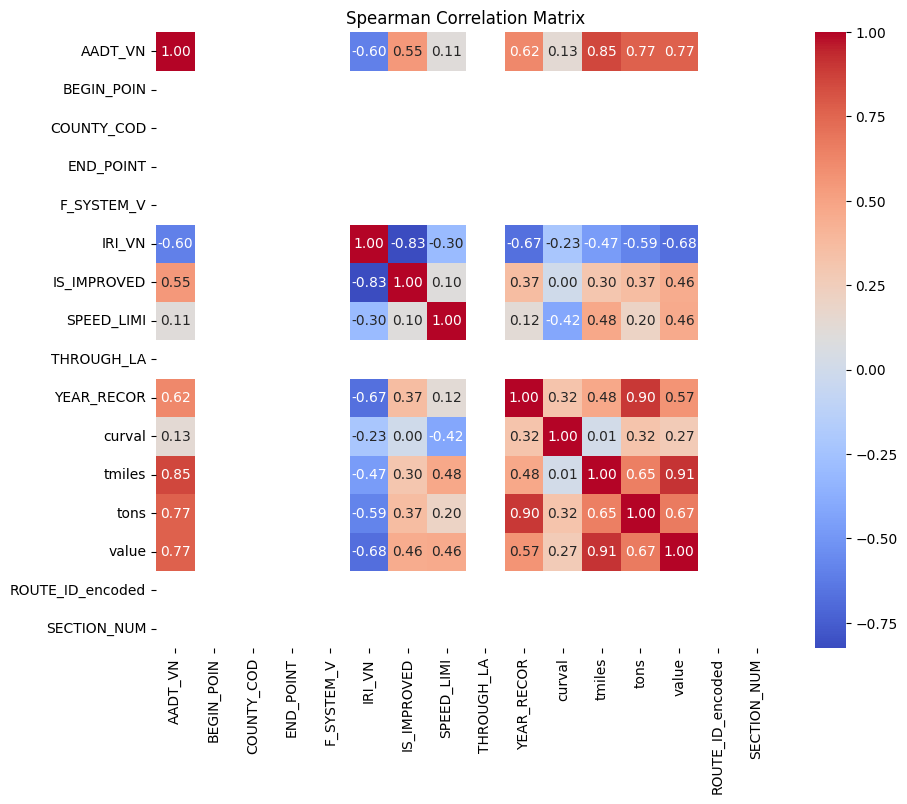

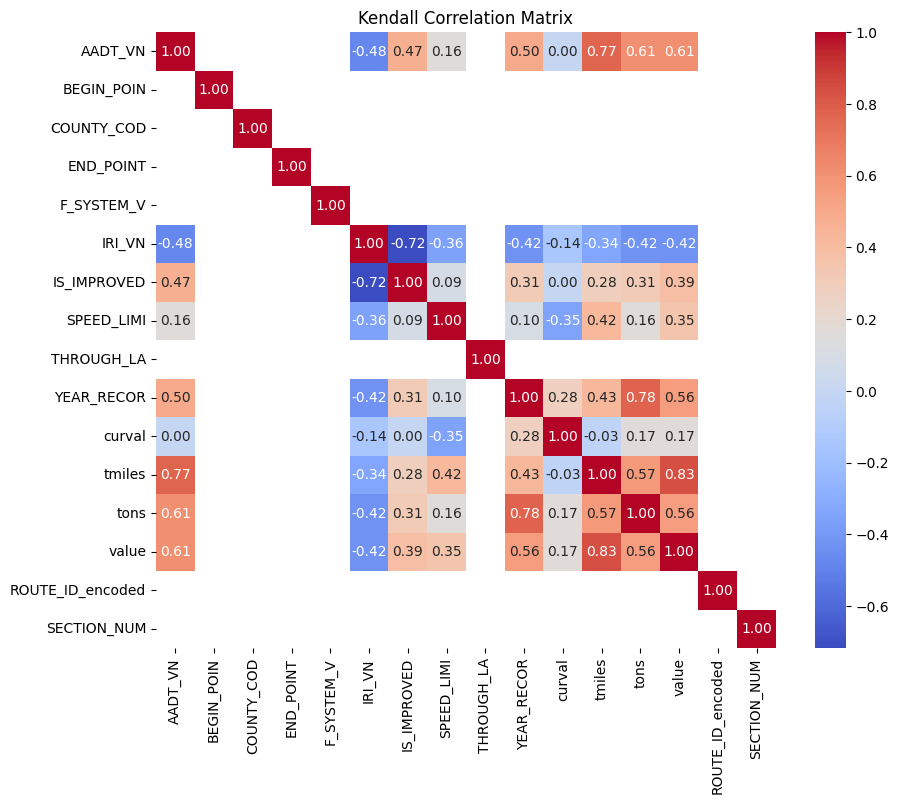

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\dcor\_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\dcor\_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\dcor\_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of 

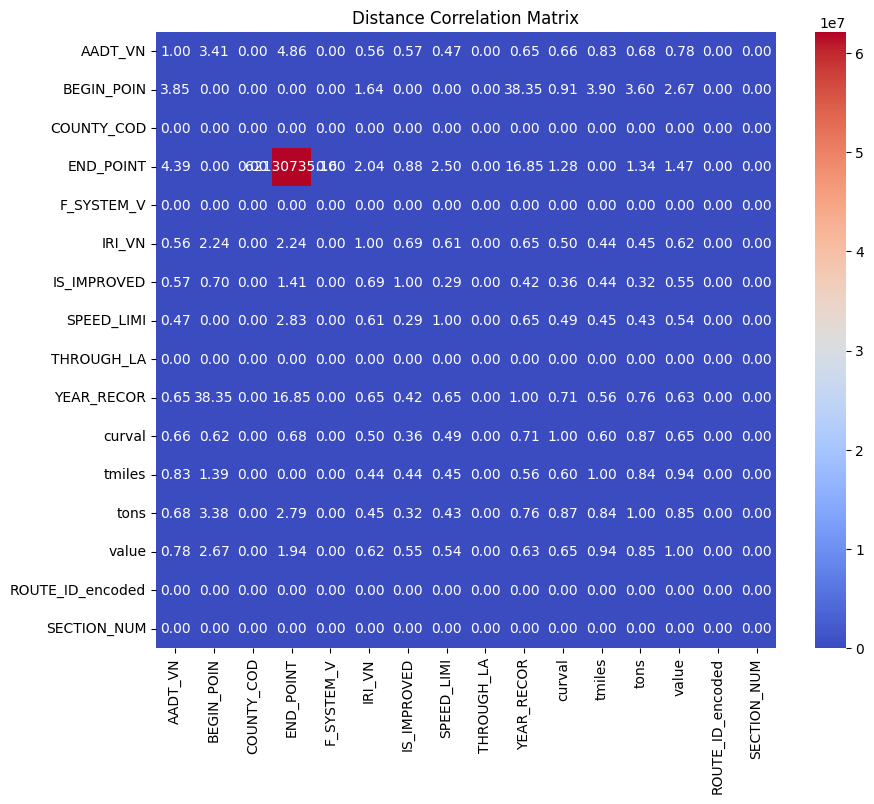

In [46]:
display_correlation_matrices(Model_df)

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming Model_df is already loaded
# Define target and features
target = 'IRI_VN'
features = ['YEAR_RECOR', 'AADT_VN', 'curval', 'tmiles', 'tons', 'value', 'IS_IMPROVED', 'SPEED_LIMI', 'THROUGH_LA']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(Model_df[features], Model_df[target], test_size=0.2, random_state=42)

# Initialize ensemble models
random_forest_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_features='sqrt', bootstrap=True, max_samples=1.0, max_depth=50)
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)
voting_regressor = VotingRegressor(estimators=[('rf', random_forest_regressor), ('gb', gradient_boosting_regressor)])

# Train models
random_forest_regressor.fit(X_train, y_train)
gradient_boosting_regressor.fit(X_train, y_train)
voting_regressor.fit(X_train, y_train)

# Make predictions
rf_predictions = random_forest_regressor.predict(X_test)
gb_predictions = gradient_boosting_regressor.predict(X_test)
voting_predictions = voting_regressor.predict(X_test)

# Evaluate models
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

rf_mse, rf_r2 = evaluate_model(rf_predictions, y_test)
gb_mse, gb_r2 = evaluate_model(gb_predictions, y_test)
voting_mse, voting_r2 = evaluate_model(voting_predictions, y_test)

# Store results
model_evaluations = {
    "Models": ["Random Forest", "Gradient Boosting", "Voting Regressor"],
    "MSE": [rf_mse, gb_mse, voting_mse],
    "R^2": [rf_r2, gb_r2, voting_r2],
}
results_df = pd.DataFrame(model_evaluations)

# Print results
print("Ensemble Model Evaluations:\n")
print(results_df)

Ensemble Model Evaluations:

              Models         MSE       R^2
0      Random Forest  399.075005  0.605294
1  Gradient Boosting  466.325689  0.538780
2   Voting Regressor  382.431411  0.621756


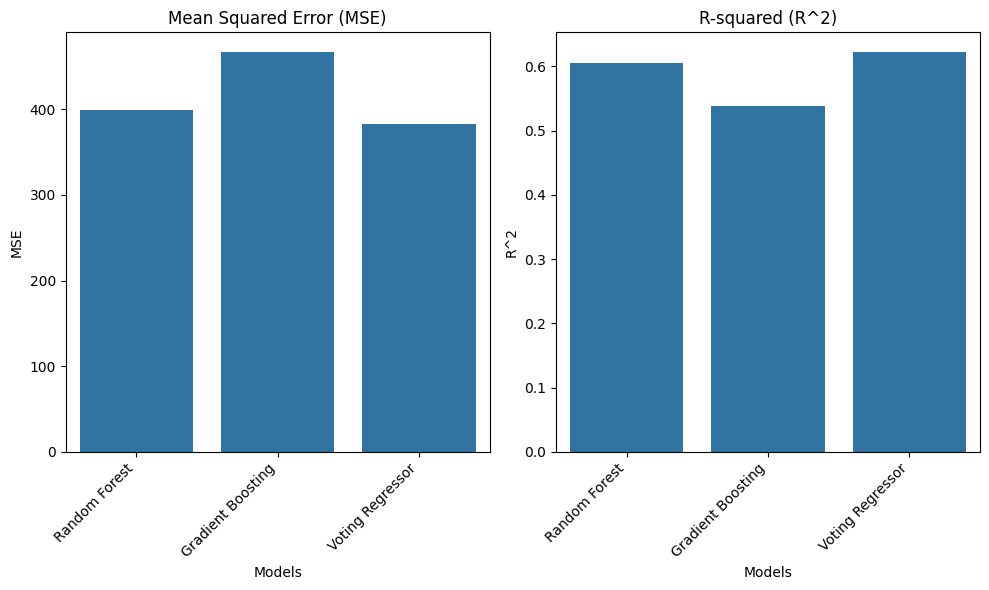

In [31]:
# Plotting the scores
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="Models", y="MSE", data=results_df)
plt.title("Mean Squared Error (MSE)")
plt.xticks(rotation=45, ha="right")

plt.subplot(1, 2, 2)
sns.barplot(x="Models", y="R^2", data=results_df)
plt.title("R-squared (R^2)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

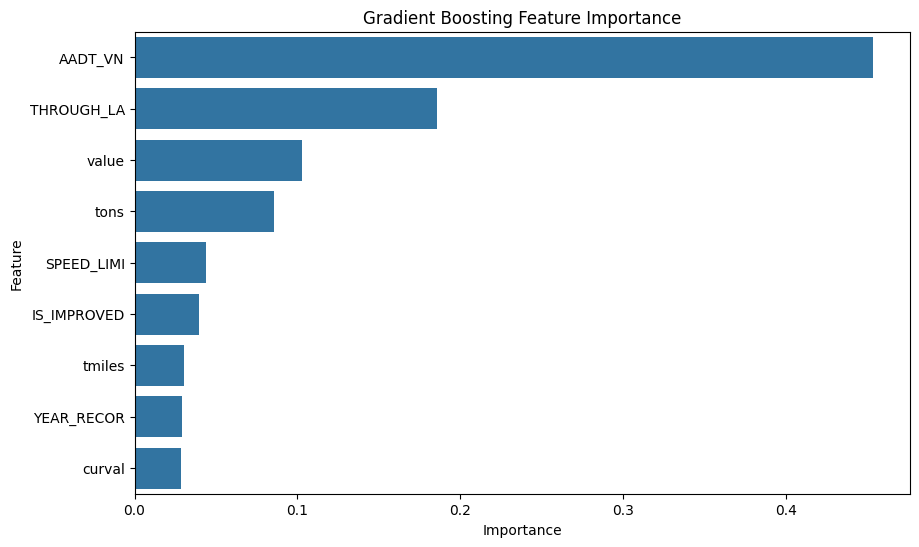

In [32]:
# Feature Importance (Gradient Boosting)
feature_importance_gb = gradient_boosting_regressor.feature_importances_
feature_importance_gb_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance_gb,
})
feature_importance_gb_df = feature_importance_gb_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_gb_df)
plt.title("Gradient Boosting Feature Importance")
plt.show()

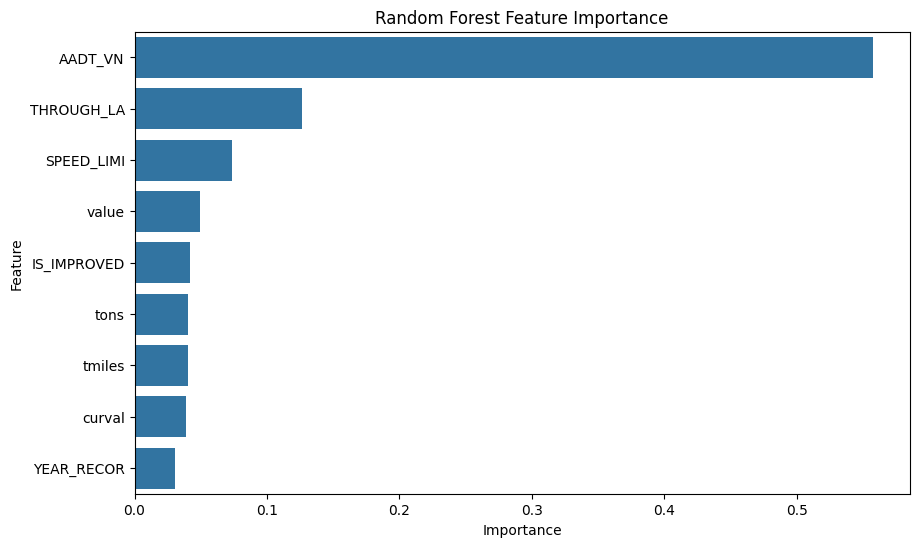

In [33]:
# Feature Importance (Random Forest)
feature_importance_rf = random_forest_regressor.feature_importances_
feature_importance_rf_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance_rf,
})
feature_importance_rf_df = feature_importance_rf_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_rf_df)
plt.title("Random Forest Feature Importance")
plt.show()
